100%|█████████▉| 999/1000 [02:57<00:00,  5.22it/s]

Saved trajectory animation to home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/unstable_equilibrium_perturbation/trajectory_unstable_eq.mp4
Saved V-nullcline animation to home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/unstable_equilibrium_perturbation/v_nullcline.png
Saved n-nullcline animation to home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/unstable_equilibrium_perturbation/n_nullcline.png


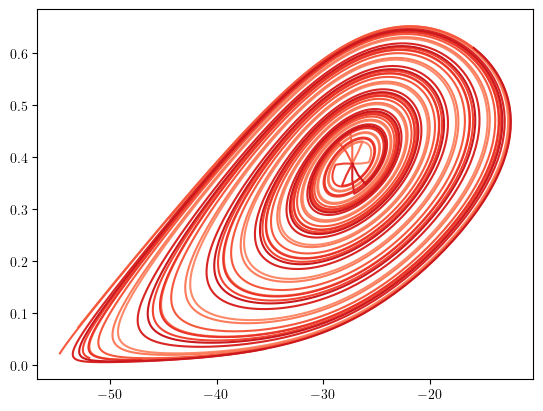

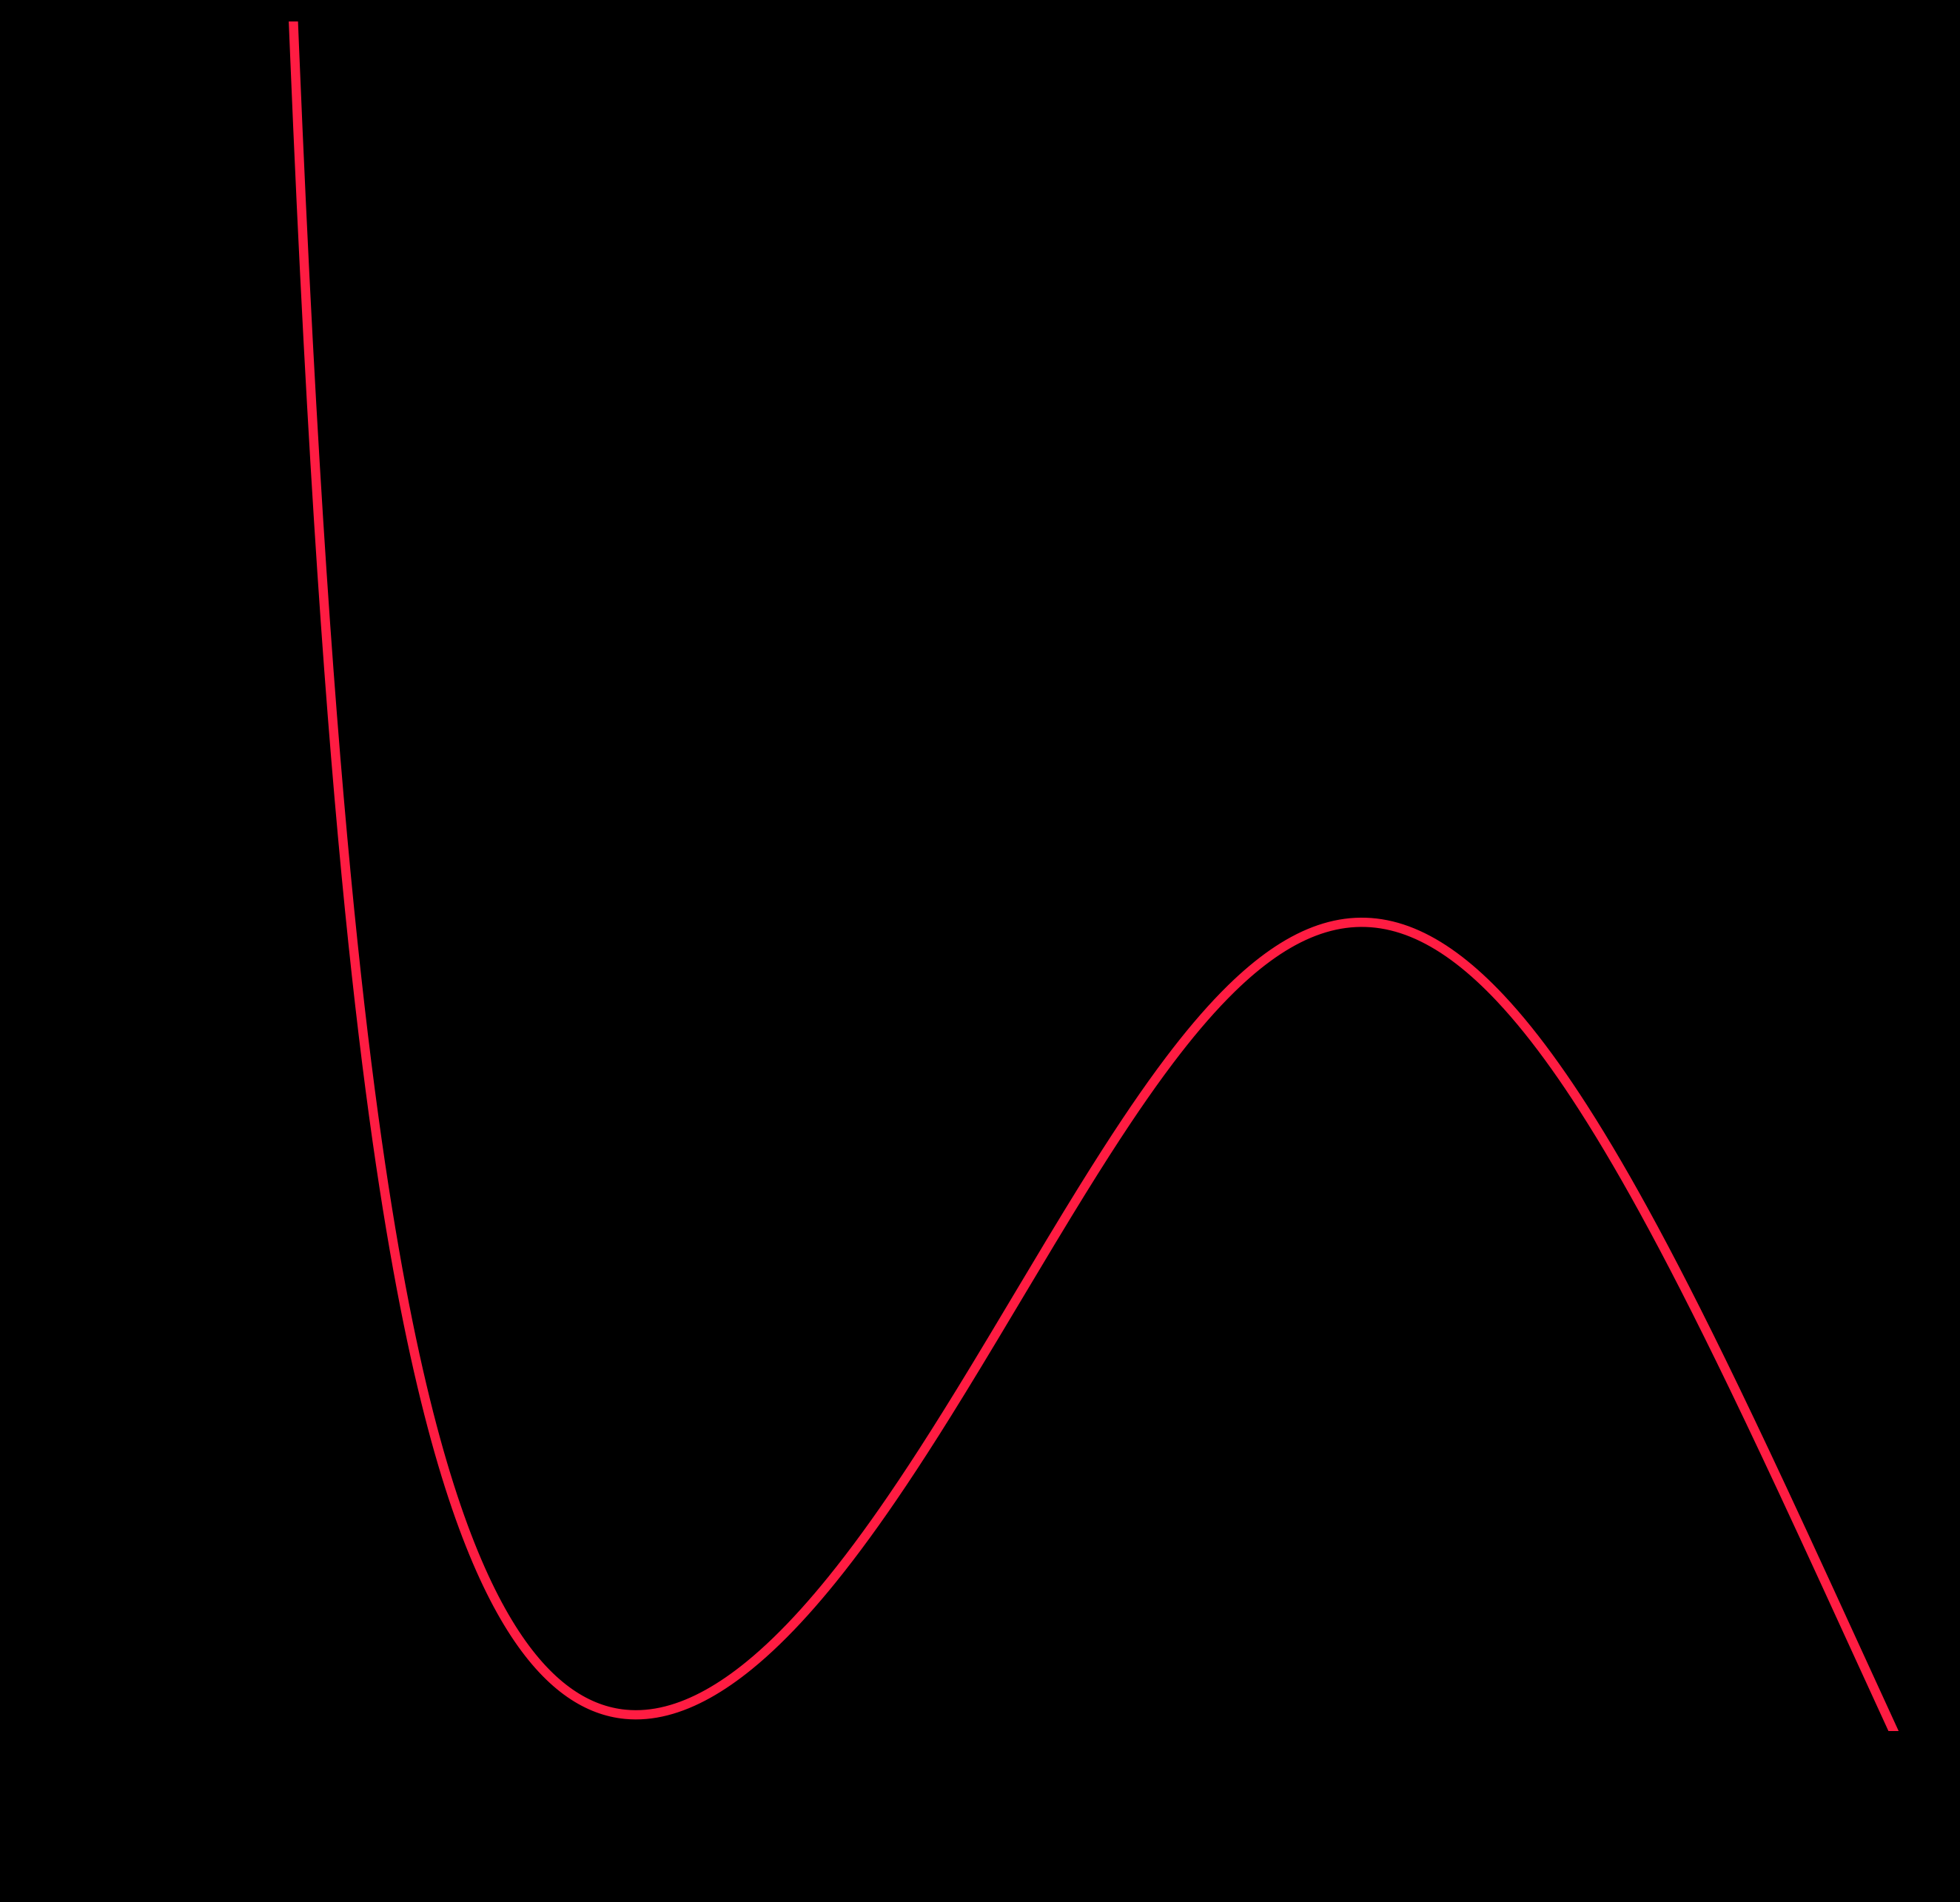

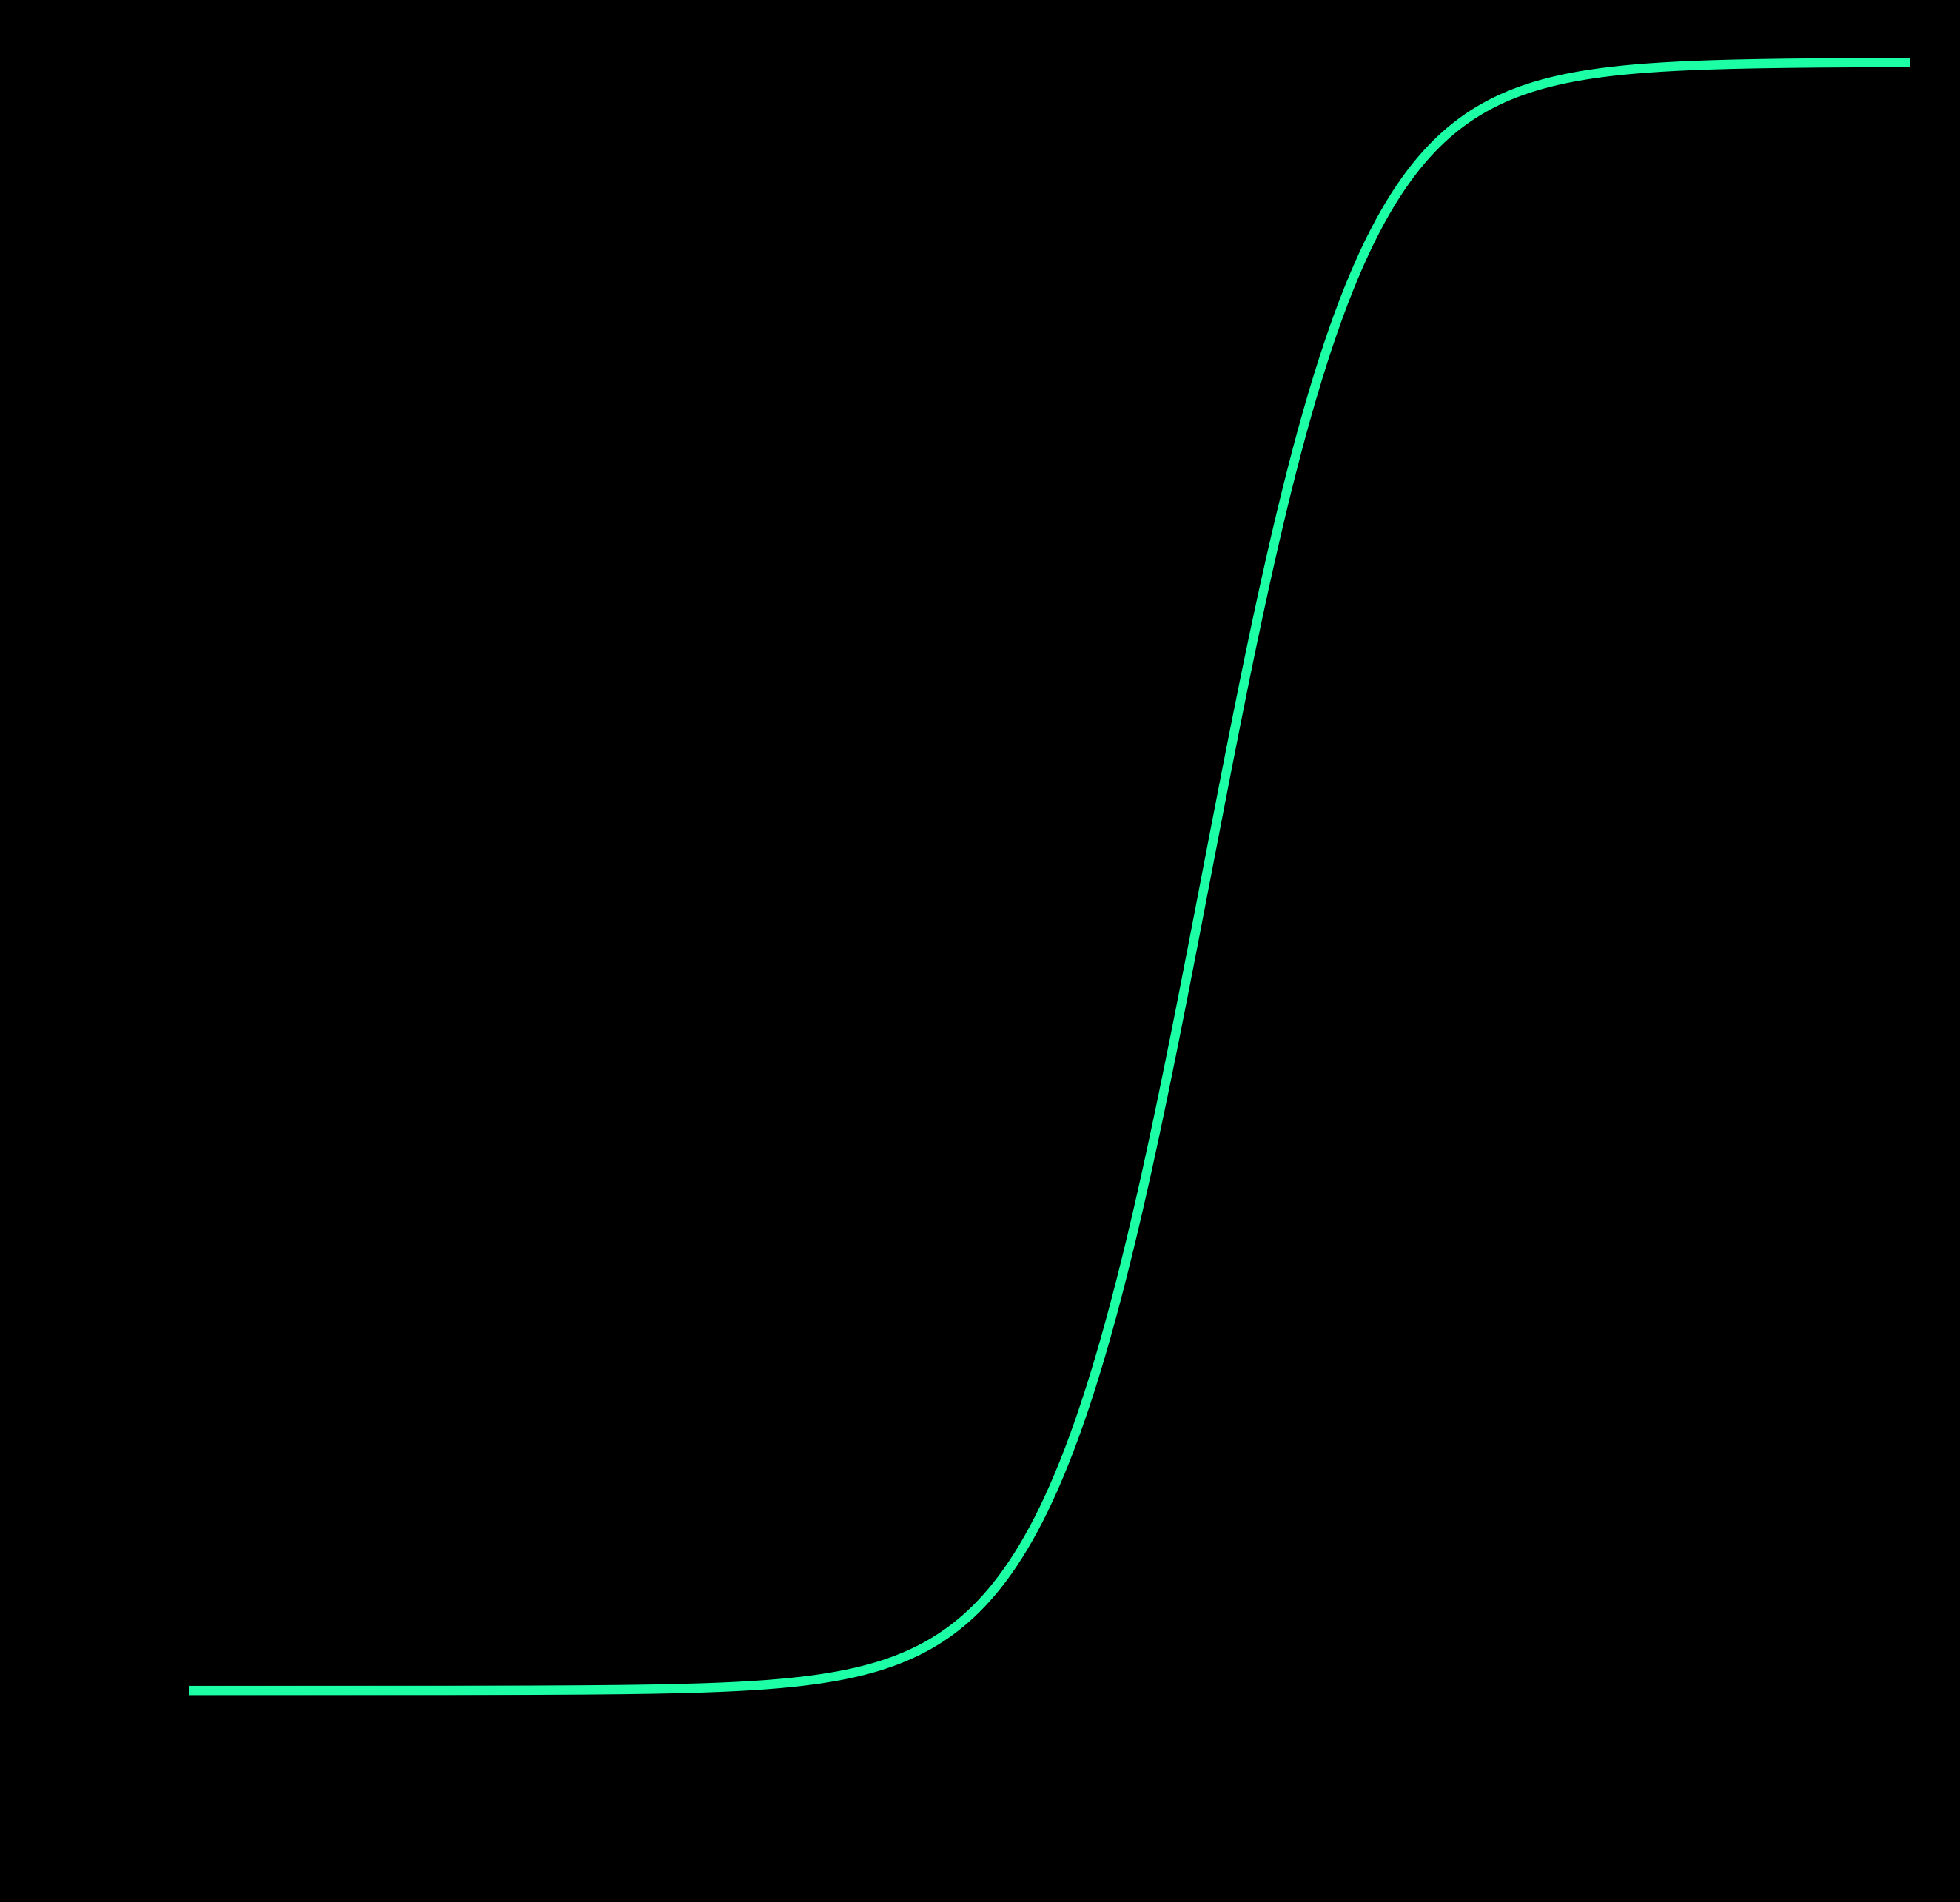

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cmasher
from NeuronModel import NeuronModel
from pathlib import Path
from termcolor import colored
from Animations import *


def StableEquilbirumPerturbationScene():
    neuron = NeuronModel('saddle-node')
    T = 5 # Total simulation time
    dt = 0.005 # Time step
    t = np.arange(0, T, dt) # Time vector
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)
    save_folder = f'/home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/stable_equilibrium_perturbation'
    Path(save_folder).mkdir(parents=True, exist_ok=True)
    perturbations = [
        (0.1, 8, 0.02),
        (0.1, 10, 0.1),
        (0.1, 7, 0.25), 
        (0.1, 8.5, 0.15),
        (0.1, -12, 0.025),
        (0.1, -10, 0.1),
        (0.1, -5, 0.2),
    ]
    for p in perturbations:
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[p], smoothing_points=5)
        #animate_trajectories(t, sol, save_folder, subsample=1, trail_length=None, suffix=f"V={p[1]}, n={p[2]}", display_start_times=0.105)  
        # haha.ipynb, line 31 (Corrected)
        animate_trajectories(t, [sol], ['white'], save_folder, subsample=1, trail_length=None, suffix=f"V={p[1]}, n={p[2]}", display_start_times=0.105)#   
    animate_phase_portrait(neuron, [0], save_folder)

def UnstableEqulibriumPerturbationScene():
    neuron = NeuronModel('saddle-node')
    T = 5 # Total simulation time
    dt = 0.005 # Time step
    t = np.arange(0, T, dt) # Time vector
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    unstable_eq = [eq for eq in equlibria if eq['stability'] == 'unstable'][0]

    X0 = [unstable_eq['point'][0], unstable_eq['point'][1]] # Initial conditions for the simulation (unstable equilibrium)
    save_folder = f'home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/unstable_equilibrium_perturbation'
    Path(save_folder).mkdir(parents=True, exist_ok=True)

    # Creating perturbation vectors as equally spread in a circle around the unstable equilibrium
    r = 0.015
    n_perturbations = 8
    cmap = cmasher.get_sub_cmap(plt.cm.Reds, 0.4, 0.8)
    perturbations, colors = [],[]
    for i in range(n_perturbations):
        angle = 2 * np.pi * i / n_perturbations
        perturbations.append((0.1, r * np.cos(angle)*100, r * np.sin(angle)*4))
        colors.append(cmap(i / n_perturbations))

    # Simulate the neuron model with perturbations
    solutions = []
    for p,col in zip(perturbations, colors):
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[p], smoothing_points=30)
        plt.plot(sol[:, 0], sol[:, 1], color=col)
        solutions.append(sol)
    #plt.show()
    animate_trajectories(t, solutions, colors, save_folder, subsample=1, trail_length=150, suffix="unstable_eq", display_start_times=0.105)
    animate_V_nullcline(neuron, [0], save_folder, arrows=True)
    animate_n_nullcline(neuron, [0], save_folder, arrows=True)




def CurrentRampNullclineShift():
    ''' Animation of a current ramp with the nullcline shift '''
    neuron = NeuronModel('saddle-node')
    T = 5 # Total simulation time
    dt = 0.05 # Time step
    t = np.arange(0, T, dt) # Time vector
    I_ext = neuron.create_ramp_current(t, 0, 5, 0, 25) # Ramp current
    save_folder = Path(f'home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/current_ramp_nullcline_shift')
    Path(save_folder).mkdir(parents=True, exist_ok=True)

    
    animate_V_nullcline(neuron, I_ext, save_folder, arrows=False)
    animate_n_nullcline(neuron, [I_ext[0]], save_folder, arrows=False) # n-nullcline is constant
    animate_vector_field(neuron, I_ext, save_folder)
    animate_streamlines(neuron, I_ext, save_folder)
    animate_equilibrium_points(neuron, I_ext, save_folder)


def ExcitabilitySmallPerturbation():
    ''' Animation of a small perturbation and return to rest (Excitability section) '''
    neuron = NeuronModel('SNIC')
    T = 13
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)

    # Sequence of perturbations
    perturbations = [
        (1, 2, 0),
        (3, 5, 0),
        (7, 8,0),
    ]
    save_dir = make_folder('ExcitabilitySmallPerturbation')
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=perturbations, smoothing_points=10)
    # animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-75, -40])
    # animate_timeseries(t, sol[:, 1], kind='n', save_folder=save_dir)
    # animate_phase_portrait(neuron, [0], save_dir)
    # animate_trajectory(t, sol, save_dir, trail_length=0)
    animate_color_square(t, sol[:,0], save_dir, vmin=-90, vmax=20)



def ExcitabilityLargePerturbation():
    ''' Animation of a large perturbation, spike and return to rest (Excitability section) '''
    neuron = NeuronModel('SNIC')
    T = 13
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)

    # Sequence of perturbations
    perturbations = [
        (1, 10, 0),
    ]
    save_dir = make_folder('ExcitabilityLargePerturbation')
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=perturbations, smoothing_points=10)
    plt.plot(t, sol[:, 0])
    #plt.show()

   # animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    # animate_phase_portrait(neuron, [0], save_dir)
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.1)
   # animate_color_square(t, sol[:,0], save_dir, vmin=-90, vmax=20)


def ExcitabilityPersistentSpiking():
    ''' Animation of persistent spiking (Excitability section) '''
    neuron = NeuronModel('SNIC')
    T = 25
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)

    save_dir = make_folder('ExcitabilityPersistentSpiking')
    I_ext = 30
    t, sol = neuron.simulate(T, dt, X0, lambda t: I_ext)
    # plt.plot(t, sol[:, 0])
    # plt.show()

    # animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    # animate_phase_portrait(neuron, [I_ext], save_dir)
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=None, suffix='all')
    # ✅ NEW (Fixed line)
    #animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=None, suffix='all')
    # ✅ NEW (Fixed line)
    #animate_trajectories(t, [sol], ['#ffffff'], save_dir, subsample=1, trail_length=None, suffix=f"V={p[1]}, n={p[2]}", display_start_time=0.105)
   # animate_trajectory(t, sol, save_dir, trail_length=150)
 #   animate_color_square(t, sol[:,0], save_dir, vmin=-90, vmax=20)



def UnstableEquilibriumRole():
    neuron = NeuronModel('saddle-node')
    T = 15
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    unstable_eq = [eq for eq in equlibria if eq['stability'] == 'unstable'][0]
    X0 = [unstable_eq['point'][0], unstable_eq['point'][1]] # Initial conditions for the simulation (unstable equilibrium)

    save_dir = make_folder('UnstableEquilibriumRole')
    I_ext = 0
    perturbations = [
        (1, 5, 0),
        (1, -5, 0),
        (1,2,0.1),
        (1, -3, -0.1)
    ]

    for k,p in enumerate(perturbations):
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, I_ext=lambda x: 0, perturbations=[p], smoothing_points=10)
     #   animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=150, display_start_times=1.1, suffix=f'perturbation_{k}')

    
    # Limit cycle 
    # mask = t>T/2
    # animate_trajectories(t[mask], [sol[mask,:]], ['#ffffff'], save_dir,  trail_length=None, suffix='limit_cycle', markersize=0, lw=4)
    # animate_phase_portrait(neuron, [I_ext], save_dir)

    # Time series and neuron 
    mask = t>T/3
    animate_timeseries(t[mask], sol[mask, 0], kind='V', save_folder=save_dir, force_ax_lims=[-60, -8])
    animate_color_square(t[mask], sol[mask,0], save_dir, vmin=-60, vmax=-8)


def SaddlePointSeparatrix():
    save_dir = make_folder('SaddlePointSeparatrix')
    neuron = NeuronModel('saddle-node')
    T = 10
    dt = 0.0025
    t = np.arange(0, T, dt)
    I_ext = 0

    # First find equilibrium points
    equilibria = neuron.find_equlibrium_points(I_ext, (VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]))
    # Find the saddle point
    saddle_point = None
    for eq in equilibria:
        if eq['stability'] == 'saddle':
            saddle_point = eq
            break
    V_saddle, n_saddle = saddle_point['point']


    # Simulating from several initial conditions around the saddle point to reveal the saddle shape
    N = 20
    X0s = np.stack([np.linspace(-54, -47, N), np.linspace(0.12, 0.08, N)], axis=1)

    solutions, colors = [], []
    cmap = cmasher.get_sub_cmap(sns.color_palette('mako', as_cmap=True), 0.2, 0.8)



    for i,X0 in enumerate(X0s):
        t, sol = neuron.simulate(T, dt, X0, I_ext=lambda x: 0)

        # Detect when the first time trajectory is outside +- 20 mV of the saddle point and replace the remaining trajectory with the last point
        mask = np.abs(sol[:, 0] - V_saddle) > 20
        if np.any(mask):
            idx = np.where(mask)[0][0]
            sol[idx:, :] = sol[idx, :] 

        plt.plot(sol[:, 0], sol[:, 1], color=cmap(i/(N-1)))
        solutions.append(sol)
        colors.append(cmap(i/(N-1)))

   # plt.show()
    animate_trajectories(t, solutions, colors, save_dir, trail_length=None, display_start_times=0, markersize=4, lw=1.5)
    # plot_separatrix(neuron, I_ext, save_dir)
  #  plot_saddle_eigenvectors(neuron, I_ext, save_dir)



def SeparatrixAttractionDomains():
    save_dir = make_folder('SeparatrixAttractionDomains')
    neuron = NeuronModel('saddle-node')
    T = 5
    dt = 0.0025
    t = np.arange(0, T, dt)
    I_ext = 0
    X0s_to_rest = [
        (-60, 0.1),
        (-60, 0.45), 
        (-84, 0.2),
        (-50, 0.4),
        (-80, 0.6),
        (-65, 0.5),
        (-85, 0.05)
    ]
    solutions_to_rest = []
    for X0 in X0s_to_rest:
        t, sol = neuron.simulate(T, dt, X0, I_ext=lambda x: 0)
        solutions_to_rest.append(sol)
    #animate_trajectories(t, solutions_to_rest, ['#ffffff']*len(X0s_to_rest), save_dir, trail_length=None, display_start_times=0, suffix='to_rest', lw=1.5, markersize=4)


    X0s_to_spiking = [
        (-50, 0.1),
        (-30, 0.15), 
        (-32, 0.5),
        (-25, 0.4),
        (-42, 0.21),
        (-35, 0.3),
        (-23, 0.35)
    ]
    solutions_to_spiking = []
    for X0 in X0s_to_spiking:
        t, sol = neuron.simulate(12, 0.005, X0, I_ext=lambda x: 0)
        solutions_to_spiking.append(sol)
    animate_trajectories(t, solutions_to_spiking, ['#ffffff']*len(X0s_to_spiking), save_dir, trail_length=None, display_start_times=0, suffix='to_spiking', lw=1.5, markersize=4)


def SeparatrixAsThresholdPerturbations():
    save_dir = make_folder('SeparatrixAsThresholdPerturbations')
    neuron = NeuronModel('saddle-node')
    T = 8
    dt = 0.0025
    t = np.arange(0, T, dt)
    I_ext = 0

    X0 = neuron.get_stable_equlibrium_location(I_ext)

    # Small perturbation (return to rest)
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[(1, 8, 0)], smoothing_points=10)
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.025, suffix='small_perturbation', lw=1.5, markersize=4)
    animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-70, 10], suffix='small_perturbation')



    # Medium perturbation (transition to repetitive spiking)
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[(1, 13, 0)], smoothing_points=15)
    animate_color_square(t, sol[:, 0], save_dir, vmin=-70, vmax=10, suffix='medium_perturbation')
    animate_color_square(t, sol[:, 0], save_dir, suffix='medium_perturbation_matte', cmap='binary_r')
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.05, suffix='medium_perturbation', lw=1.5, markersize=4)
    animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-70, 10], suffix='medium_perturbation')


    # Large perturbation (transition to persistent spiking)
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[(1, 30, 0)], smoothing_points=20)
    animate_color_square(t, sol[:, 0], save_dir, vmin=-70, vmax=10, suffix='large_perturbation')
    animate_color_square(t, sol[:, 0], save_dir, suffix='large_perturbation_matte', cmap='binary_r')
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.02, suffix='large_perturbation', lw=1.5, markersize=4)
    animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-70, 10], suffix='large_perturbation')



def BistablePerturbationsSwitching():
    save_dir = make_folder('BistablePerturbationsSwitching')
    neuron = NeuronModel('saddle-node')
    T = 25
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ext = 0
    X0 = neuron.get_stable_equlibrium_location(I_ext)

    # Perturbations
    perturbations = [
        (0.5, 12, 0),
        (10.6, -20, 0),
        (12, 4, 0),
        (14, -5, 0),
        (16, 15, 0),
        (22, -15, 0)
    ]

    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i: I_ext, perturbations, smoothing_points=3)
 #   animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=80, markersize=6, lw=2.5)




def MonostablePerturbations():
    save_dir = make_folder('MonostablePerturbations')
    neuron = NeuronModel('SNIC')
    T = 25
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ext = 0
    X0 = neuron.get_stable_equlibrium_location(I_ext)

    # Perturbations
    perturbations = [
        (0.5, 11, 0),
        (8, 12, 0),
        (20, 13, 0),
    ]

    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i: I_ext, perturbations, smoothing_points=3)
    #animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=80, markersize=6, lw=2.5)
   # animate_phase_portrait(neuron, [I_ext], save_dir)

    # Limit cycle
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i: I_ext, [(0.1, 12, 0)], smoothing_points=1)
    #save_still_trajectory(sol[:,0], sol[:,1], 'white', save_dir, 'limit_cycle', lw=2.5)

    # Separatrix
    V_sep, n_sep = neuron.find_separatrix(I_ext)
    save_still_trajectory(V_sep, n_sep, 'white', save_dir, 'separatrix', lw=3)


def SaddleNodeBifurcation():
    neuron = NeuronModel('saddle-node')
    save_dir = make_folder('SaddleNodeBifurcation')
    T = 15
    dt = 0.01
    t = np.arange(0, T, dt)

    I_ext = neuron.create_ramp_current(t, 0, T, 0, 10) # Ramp current
    animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    animate_vector_field(neuron, I_ext, save_dir)
    animate_equilibrium_points(neuron, I_ext, save_dir)
    animate_limit_cycle(neuron, I_ext, save_dir)
    # animate_streamlines(neuron, I_ext, save_dir)

    # --- Trajectories flow to the limit cycle from all initial conditions
    N_cond = 40
    X0s = np.random.random(size=(N_cond, 2))
    X0s[:,0] = X0s[:,0]*90 - 80
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(10, 0.005, X0, lambda i:  I_ext[-1])
        solutions.append(sol)
        plt.plot(sol[:,0], sol[:,1])
    plt.show()

    animate_trajectories(t, solutions, ['#ffffff']*N_cond, save_dir, trail_length=200, markersize=4, suffix='swarm', lw=1.5)

    
def SNICBifurcation():
    neuron = NeuronModel('SNIC')
    save_dir = make_folder('SNIC_Bifurcation')
    T = 10
    dt = 0.005
    t = np.arange(0, T, dt)

    # Animating the bifurcation (equilibrium points, nullclines, vector field)
    I_ext = neuron.create_ramp_current(t, 0, T, 0, 20) # Ramp current
    # animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ext, save_dir)
    # animate_equilibrium_points(neuron, I_ext, save_dir)

    # Invariant circle
    # animate_invariant_circle(neuron, I_ext, save_dir, lw=5)

    # Trajectory (with extended current to T=20)
    T_extended = 20
    t = np.arange(0, T_extended, dt)
    I_ext = neuron.create_ramp_current(t, 0, T, 0, 20) # Ramp current same as before

    t, sol = neuron.simulate(T_extended, dt, neuron.get_stable_equlibrium_location(I_ext[0]), I_ext)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=100, markersize=4, lw=1.5)


def HighToLowThresholdInterpolation():
    N_frames = 300
    save_dir = make_folder('HighToLowThresholdInterpolation')

    fig, ax = setup_phase_portait_ax()
    x_high_res = np.linspace(VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1], 1000) # Voltage values for high resolution nullcline
    
    V_nullcline_start = NeuronModel('saddle-node').V_nullcline(x_high_res, 0)
    V_nullcline_end = NeuronModel('supercritical_Hopf').V_nullcline(x_high_res, 0)

    neuron = NeuronModel('saddle-node')
    line_V = ax.plot(x_high_res, V_nullcline_start, color='#ff1c42', lw=3)[0]
    line_n = ax.plot(x_high_res, neuron.n_nullcline(x_high_res), color='#1cffa4', lw=3)[0]

    V_mid_n_values = np.linspace(neuron.V_mid_n, NeuronModel('supercritical_Hopf').V_mid_n, N_frames)

    def update(prop):
        V_nullcline = V_nullcline_start * (1-prop) + V_nullcline_end * prop
        neuron.V_mid_n = V_mid_n_values[int(prop * (N_frames-1))]
        n_nullcline = neuron.n_nullcline(x_high_res)
        line_V.set_ydata(V_nullcline)
        line_n.set_ydata(n_nullcline)
        return line_V, line_n


    ani = FuncAnimation(fig, update, frames=tqdm(np.linspace(0, 1, N_frames)), interval=30, blit=True)
    ani.save(f'{save_dir}/HighToLowThresholdInterpolation.mp4', fps=30, dpi=300)


def HopfBifurcationPreview():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('HopfBifurcationPreview')
    T = 8
    dt = 0.005
    t = np.arange(0, T, dt)

    I_ext = neuron.create_ramp_current(t, 0, T, 0, 30) # Ramp current


    # animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    animate_vector_field(neuron, I_ext, save_dir)
    # animate_equilibrium_points(neuron, I_ext, save_dir)
    # save_axes(save_dir)

    # --- Some trajectories to show the stable equilibrium before the bifurcation
    # N_sol = 20
    # X0s = np.random.random(size=(N_sol, 2))
    # X0s[:,0] = X0s[:,0]*30 - 80
    # solutions = []
    # for X0 in X0s:
    #     t, sol = neuron.simulate(5, 0.005, X0, lambda i:  I_ext[0])
    #     solutions.append(sol)

    # animate_trajectories(t, solutions, ['#ffffff']*N_sol, save_dir, trail_length=100, markersize=4, lw=1.5, suffix='before_bifurcation')


def SupercriticalHopf():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopf')
    T = 15
    dt = 0.005
    t = np.arange(0, T, dt)

    # --- Before the bifurcation (0 current). Certain perturbations are amplified resulting in single-spike return to rest via detour
    I_ext = 0
    X0 = neuron.get_stable_equlibrium_location(I_ext)
    perturbations, colors = [],[]
    N_solutions = 40
    for d in np.linspace(1, 20, N_solutions):
        perturbations.append((0.1, d, 0))
        colors.append(cmasher.get_sub_cmap(plt.cm.Reds, 0.2, 0.8)(d/20))

    solutions = []
    for p in perturbations:
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_ext, [p], smoothing_points=0)
        solutions.append(sol)
#    animate_trajectories(t, solutions, colors, save_dir, trail_length=None, markersize=4, lw=1.5, suffix='perturbations_before_bifurcation', display_start_times=0.105)

    # --- Show individual trajectories
    idx_selected = [-1, int(23)]
    names = ['strong', 'weak']
    for idx, name in zip(idx_selected, names):
        #animate_timeseries(t, solutions[idx][:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-80, 20], suffix=f'{name}_perturbation_before_bifurcation')
        # animate_trajectories(t, [solutions[idx]], [colors[idx]], save_dir, trail_length=None, markersize=4, lw=2.5, suffix=f'{name}_perturbation_before_bifurcation', display_start_times=0.105)
        # animate_color_square(t, solutions[idx][:,0], save_dir, vmin=-80, vmax=20, suffix=f'{name}_perturbation_before_bifurcation')
        # animate_color_square(t, solutions[idx][:,0], save_dir, vmin=-80, vmax=20, suffix=f'matte{name}_perturbation_before_bifurcation', cmap='binary_r')
        continue

    # --- Plot gradient lines (to compare with SNIC invariant circle)
    Vs = [s[:,0] for s in solutions]
    ns = [s[:,1] for s in solutions]
    plot_gradient_lines(Vs, ns, save_dir, lw=1.8)


def SupercriticalHopfCycleEmergence():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopfCycleEmergence')
    T = 5
    dt = 0.005
    t = np.arange(0, T, dt)
    I_ext = neuron.create_ramp_current(t, 0, T, 0, 20) # Ramp current to 20pA (intermediate small cycle)
    # animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ext, save_dir)
    # animate_equilibrium_points(neuron, I_ext, save_dir)
    # save_axes(save_dir)
    #animate_limit_cycle(neuron, I_ext, save_dir)

    # --- Trajectories converging to the small limit cycle
    # --- Some trajectories to show the stable equilibrium before the bifurcation (sampled from the left side to the limit cycle, using Latin Hypercube Sampling)
    N_sol = 20

    X0s = latin_hypercube_sampling_2d(N_sol, [-80, -50], [0.1, 0.5], seed=42)
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ext[-1])
        solutions.append(sol)

   # animate_trajectories(t, solutions, ['white']*len(solutions), save_dir, markersize=4, lw=1.5, trail_length=150, suffix='converge_to_cycle')


    # --- Perturbation makes a spike detour, but converges to the limit cycle afterwards
    N_solutions = 30
    solutions, colors = [], []
    X0 = neuron.get_unstable_equlibrium_location(I_ext[-1])
    for d in np.linspace(5, 20, N_solutions):
        t, sol = neuron.simulate_with_perturbations(25, 0.01, X0, lambda i:  I_ext[-1], [(0.1, d, 0)], smoothing_points=0)
        colors.append(cmasher.get_sub_cmap(plt.cm.Reds, 0.2, 0.8)(d/20))
        solutions.append(sol)
        plt.plot(sol[:,0], sol[:,1], color=colors[-1])
    #plt.show()
    animate_trajectories(t, solutions, colors, save_dir, trail_length=250, markersize=4, lw=1.5, suffix='detour_to_cycle', display_start_times=0.105)




def SupercriticalHopfCycleGrowth():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopfCycleGrowth')
    T = 5
    dt = 0.005
    t = np.arange(0, T, dt)
    I_ext = neuron.create_ramp_current(t, 0, T, 20, 60) # Ramp current from 20 to 60pA
    animate_equilibrium_points(neuron, I_ext, save_dir)
    animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    animate_vector_field(neuron, I_ext, save_dir)
    animate_limit_cycle(neuron, I_ext, save_dir)
    animate_limit_cycle_time_series(neuron, I_ext, save_dir)

def SubcriticalHopf():
    neuron = NeuronModel('subcritical_Hopf')
    save_dir = make_folder('SubcriticalHopf')


    T_ramp = 10
    I_min, I_max = 43, 55
    I_ramp = neuron.create_ramp_current(np.arange(0, T_ramp, 0.01), 0, T_ramp, I_min, I_max) # Ramp current
   # animate_streamlines(neuron, I_ramp, save_dir)



    # animate_equilibrium_points(neuron, I_ramp, save_dir)
    # animate_unstable_limit_cycle(neuron, I_ramp, save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [I_ramp[0]], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ramp, save_dir)
    # save_axes(save_dir)
    
    #  animate_spiking_orbit_subcritical_Hopf(neuron, I_ramp, save_dir)


    # --- Trajectories converging to the limit cycle before the bifurcation
    X0s = [
        (-60, 0.1),
        (-80, 0.2),
        (-70, 0.8),
        (-20, 0.95),
        (0, 0.65),
        (0, 0.05),
        (0, 0.95),
        (10, 0.75),
        (-20, 0.4),
        (-30, 0.2),
        (-40, 0.1)
    ]
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ramp[0])
        solutions.append(sol)
   # animate_trajectories(t, solutions, ['white']*len(solutions), save_dir, trail_length=200, markersize=4, lw=1.5, suffix='converge_to_cycle_before_bifurcation')

    # --- Trajectories converging to rest before the bifurcation
    X0s = [
        (-50, 0.6),
        (-60, 0.4),
        (-55, 0.2),
        (-47, 0.3),
        (-43, 0.45)
    ]
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ramp[0])
        solutions.append(sol)
   # animate_trajectories(t, solutions, ['white']*len(solutions), save_dir, trail_length=200, markersize=4, lw=1.5, suffix='converge_to_rest_before_bifurcation')


    # --- Trajectory split with a perturbation (bistability illustration)
    X0 = [-50, 0.4] # Start in the basin of attraction of the stable equilibrium
    t, sol_to_rest = neuron.simulate(20, 0.01, X0, lambda i:  I_ramp[0])
    t, sol_to_cycle = neuron.simulate_with_perturbations(20, 0.01, X0, lambda i:  I_ramp[0], [(1, 20, 0)], smoothing_points=5)
    #animate_trajectories(t, [sol_to_rest, sol_to_cycle], ['white', 'white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='bistability_split')
    # animate_color_square(t, sol_to_rest[:,0], save_dir, vmin=-74, vmax=0, suffix='REST_bistability_split')
    # animate_color_square(t, sol_to_rest[:,0], save_dir, vmin=-74, vmax=0, suffix='REST_bistability_split_matte', cmap='binary_r')
    # animate_color_square(t, sol_to_cycle[:,0], save_dir, vmin=-74, vmax=0, suffix='CYCLE_bistability_split')
    # animate_color_square(t, sol_to_cycle[:,0], save_dir, vmin=-74, vmax=0, suffix='CYCLE_bistability_split_matte', cmap='binary_r')

    # --- Trajectories converging to the limit cycle after the bifurcation
    N_sol = 15
    solutions=[]
    unstable_eq = neuron.get_unstable_equlibrium_location(I_ramp[-1])
    for i in range(N_sol):
        angle = 2 * np.pi * i / N_sol
        X0 = [unstable_eq[0] + 2*np.cos(angle),
                    unstable_eq[1] + np.sin(angle)*0.05]
        _, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ramp[-1])
        solutions.append(sol)
    animate_trajectories(t, solutions, ['white']*N_sol, save_dir, trail_length=200, markersize=4, lw=1.5, suffix='converge_to_cycle_after_bifurcation')
        



def SaddleNodeBifurcationFull():
    neuron = NeuronModel('saddle-node')
    save_dir = make_folder('SaddleNodeBifurcationFull')
    T = 20
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ramp = neuron.create_ramp_current(t, 0, T, 0, 15) # Ramp current

    # save_axes(save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant 
    # animate_vector_field(neuron, I_ramp, save_dir)
    # animate_equilibrium_points(neuron, I_ramp, save_dir)
   # animate_separatrix(neuron, I_ramp, save_dir, close_curve=True, suffix='loop')
   # animate_separatrix(neuron, I_ramp, save_dir)
   # animate_limit_cycle(neuron, I_ramp, save_dir)

    # Trajectories before the bifurcation
    X0 = neuron.get_stable_equlibrium_location(I_ramp[0])
    perturbations = [
        (0.5, 4,  0.05),
        (1, 4, 0),
        (1.2, 4, 0),
        (1.3, 1, 0),
        (1.5, 6, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(10, dt, X0, lambda i:  I_ramp[0], perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=50, markersize=4, lw=1.5, suffix='before_bifurcation')



def SNICBifurcationFull():
    neuron = NeuronModel('SNIC')
    save_dir = make_folder('SNICBifurcationFull')
    T = 20
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ramp = neuron.create_ramp_current(t, 0, T, 0, 15) # Ramp current

    # save_axes(save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ramp, save_dir)
    # animate_equilibrium_points(neuron, I_ramp, save_dir)
    # animate_invariant_circle(neuron, I_ramp, save_dir)
   # animate_streamlines(neuron, I_ramp, save_dir)
    # animate_separatrix(neuron, I_ramp, save_dir)

    X0 = neuron.get_stable_equlibrium_location(I_ramp[0])
    perturbations = [
        (0.5, 4,  0.05),
        (1.5, 4, 0),
        (2, 4, 0),
        (2.3, 3, 0),
        (2.6, 7, 0),
        (2.7, 5, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(10, dt, X0, lambda i:  I_ramp[0], perturbations, smoothing_points=5)
   # animate_trajectories(t, [sol], ['white'], save_dir, trail_length=50, markersize=4, lw=1.5, suffix='before_bifurcation')


    # --- Trajectories after the bifurcation (repetitve spiking)
    X0 = [-40, 0.02]
    t, sol = neuron.simulate(20, dt, X0, lambda i:  I_ramp[-1])
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=50, markersize=4, lw=1.5, suffix='after_bifurcation')



def SupercriticalHopfBifurcationFull():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopfBifurcationFull')
    T = 5
    dt = 0.005
    t = np.arange(0, T, dt)
    I_ramp = neuron.create_ramp_current(t, 0, T, 0, 60) # Ramp current

    # save_axes(save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ramp, save_dir)
    # animate_equilibrium_points(neuron, I_ramp, save_dir)
    # animate_limit_cycle(neuron, I_ramp, save_dir)
    animate_streamlines(neuron, I_ramp, save_dir, density=1)


def ResonatorSupercriticalTrajectories():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('ResonatorSupercriticalTrajectories')
    T = 30
    dt = 0.01
    t = np.arange(0, T, dt)
    I_snapshot = 412/1000 * 60 # 412 frame in After Effects (out of 1000), with 60 pA current
    # --- Properly timed perturbations to reveal the resonator behavior
    X0 = [-60, 0.2]
    perturbations = [
        (10.70, 10, 0),
        (17.96, 10, 0),
        (25.14, 10, 0),

    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='good_timing')
    # --- Pooperly timed perturbations to reveal the resonator behavior
    X0 = [-60, 0.2]
    perturbations = [
        (8.74, 10, 0),
        (14.43, 10, 0),
        (22.78, 10, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='bad_timing')


def ResonatorSubcriticalTrajectories():
    neuron = NeuronModel('subcritical_Hopf')
    save_dir = make_folder('ResonatorSubcriticalTrajectories')
    T = 30
    dt = 0.01
    t = np.arange(0, T, dt)
    I_min, I_max = 43, 55
    I_snapshot = 341/1000 * (I_max-I_min) + I_min   # 341 frame in After Effects (out of 1000) with ramp from 43 to 55 pA
    # --- Properly timed perturbations to reveal the resonator behavior
    X0 = [-52, 0.25]
    perturbations = [
        (6.45, 4, 0),
        (23.46, 13.5, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='good_timing')

    # --- Pooperly timed perturbations to reveal the resonator behavior
    X0 = [-52, 0.25]
    perturbations = [
        (7.9, 2, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
   # animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='bad_timing')


def IntroductionHysteresisScene():
    neuron = NeuronModel('subcritical_Hopf')
    save_dir = make_folder('IntroductionHysteresisScene')
    T = 40
    dt = 0.01
    t = np.arange(0, T, dt)

    I = 45 # for bistability

    t, sol1 = neuron.simulate(T, dt, [-50, 0.1], lambda i: I)
    # Selecting 2 cycles of the oscillation
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(sol1[:, 0], height=-40)
    t1, sol1 = t[peaks[-4]:peaks[-1]], sol1[peaks[-4]:peaks[-1]]
    # animate_color_square(t1, sol1[:,0], save_dir, vmin=-80, vmax=0, suffix='cycle1')
    # animate_color_square(t1, sol1[:,0], save_dir, vmin=-80, vmax=0, suffix='cycle1_matte', cmap='binary_r')

    # Another neuron is sitting at rest
    X0 = neuron.get_stable_equlibrium_location(I)
    X0[0] += 6
    t2, sol2 = neuron.simulate(50, dt, X0, lambda i: I)
    animate_color_square(t2, sol2[:,0], save_dir, vmin=-80, vmax=0, suffix='rest')
    animate_color_square(t2, sol2[:,0], save_dir, vmin=-80, vmax=0, suffix='rest_matte', cmap='binary_r')

def AlphaBetaEqullibriumScene():
    alpha = 0.6
    beta = 0.2
    t = np.linspace(0, 5, 1000)
    from scipy.integrate import odeint
    sol = odeint(
        lambda n,t: alpha*(1-n) - beta*n,
        0.1,
        t
    )
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylabel('') 
    line1 = ax.plot([], [], color='#2EFF86', lw=3)[0]
    line2 = ax.plot([], [], color='#ff2954', lw=3)[0]

    def update(i):
        line1.set_data(t[:i], sol[:i])
        line2.set_data(t[:i], alpha*(1-sol[:i]))
        return line1, line2
    
    ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(t), 2)), interval=30, blit=True)
    ani.save('AlphaBetaEqullibriumScene.mp4', fps=30, dpi=300)


def NinfitityTauGraph():
    from scipy.integrate import odeint
    # --- Still image
    # alpha = 0.6
    # beta = 0.2
    # n_inf = alpha / (alpha + beta)
    # tau = 1 / (alpha + beta)
    # t = np.linspace(0, 5, 1000)
    
    # sol = odeint(
    #     lambda n,t: alpha*(1-n) - beta*n,
    #     0.1,
    #     t
    # )
    # fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    # ax.set_xlim(t[0], t[-1])
    # ax.set_ylabel('')
    # ax.plot(t, sol, color='#2EFF86', lw=3)
    # ax.axhline(n_inf, color='white', lw=3, ls='--')
    # ax.axvline(tau, color='white', lw=3, ls='--')
    # fig.savefig('NinfitityTauGraph.svg', dpi=300)

    # --- Animation when n > n_inf
    alpha = 0.4
    beta = 0.5
    n_inf = alpha / (alpha + beta)
    tau = 1 / (alpha + beta)
    t = np.linspace(0, 5, 1000)
    sol = odeint(
        lambda n,t: alpha*(1-n) - beta*n,
        0.9,
        t
    )
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylim( n_inf-0.05, 1)
    ax.set_ylabel('')
    line = ax.plot([], [], color='#2EFF86', lw=3)[0]
    ax.axhline(n_inf, color='white', lw=1, ls='--')
    def update(i):
        line.set_data(t[:i], sol[:i])
        return line,
    # ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(t), 2)), interval=30, blit=True)
    # ani.save('NinfitityTauGraph_n_greater_ninf.mp4', fps=30, dpi=300)

    # --- Animation when n < n_inf
    alpha = 0.6
    beta = 0.2
    n_inf = alpha / (alpha + beta)
    tau = 1 / (alpha + beta)
    t = np.linspace(0, 5, 1000)
    sol = odeint(
        lambda n,t: alpha*(1-n) - beta*n,
        0.1,
        t
    )
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylim( 0, n_inf+0.05)
    ax.set_ylabel('')
    line = ax.plot([], [], color='#2EFF86', lw=3)[0]
    ax.axhline(n_inf, color='white', lw=1, ls='--')
    def update(i):
        line.set_data(t[:i], sol[:i])
        return line,
    # ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(t), 2)), interval=30, blit=True)
    # ani.save('NinfitityTauGraph_n_less_ninf.mp4', fps=30, dpi=300)

    # --- Animation for morphing curves as we change tau
    tau_vals = np.linspace(tau, 0.1*tau, 1000)
    solutions = [ odeint(lambda n,t: (n_inf - n)/tt, 0.1, t) for tt in tau_vals]
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylim( 0, n_inf+0.05)
    ax.set_ylabel('')
    line = ax.plot([], [], color='#2EFF86', lw=3)[0]
    ax.axhline(n_inf, color='white', lw=1, ls='--')
    def update(i):
        line.set_data(t, solutions[i])
        return line,
    ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(tau_vals), 2)), interval=30, blit=True)
    ani.save('NinfitityTauGraph_morphing.mp4', fps=30, dpi=300)




def TauComparison():
    # Alpha and beta rate constants as a function of voltage (mV)
    alpha_n = lambda V: 0.01*(10-V)/(np.exp((10-V)/10)-1)
    beta_n = lambda V: 0.125*np.exp(-V/80)

    alpha_m = lambda V: 0.1*(25-V)/(np.exp((25-V)/10)-1)
    beta_m = lambda V: 4*np.exp(-V/18)

    alpha_h = lambda V: 0.07*np.exp(-V/20)
    beta_h = lambda V: 1/(np.exp((30-V)/10)+1)

    # Freeze voltage 
    V = -60
    tau_n = 1/(alpha_n(V) + beta_n(V))
    tau_m = 1/(alpha_m(V) + beta_m(V))
    tau_h = 1/(alpha_h(V) + beta_h(V))

    fig, axs = plt.subplots(1, 3, figsize=(25, 3))
    fig.set_facecolor('black')

    for ax in axs:
        ax.set_facecolor('black')
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', colors='white', labelsize=15)
        ax.tick_params(axis='y', colors='white', labelsize=15)
        # ax.yaxis.label.set_color('white')
        # ax.xaxis.label.set_color('white')
        ax.set_xlabel('Time, ms',fontsize=18, color='white')

    for tau, ax, color in zip([tau_n, tau_m, tau_h], axs, ['#2EFF86', '#FF2954', '#FFD800']):
        x_inf = 0.8 
        t = np.linspace(0, 4, 1000)
        sol = x_inf + (0.1 - x_inf) * np.exp(-t/tau)
        ax.plot(t, sol, color=color, lw=3)
        ax.axhline(x_inf, color='white', lw=1, ls='--', zorder=-1)
        ax.set_xlim(t[0], t[-1])
       # ax.set_title(f'{tau:.3f} ms', color='white')
    plt.show()
    fig.savefig('TauComparison.svg')




if __name__ == "__main__":
    # Uncomment the scene you want to render, and run the script 
    pass

    # --- Introduction
    #  IntroductionHysteresisScene()
    #  AlphaBetaEqullibriumScene()
    #  NinfitityTauGraph()
    #  TauComparison()

    # --- Phase portraits
    #  StableEquilbirumPerturbationScene()
    #  UnstableEqulibriumPerturbationScene()
    #  CurrentRampNullclineShift()


    # --- Excitability
    #  ExcitabilitySmallPerturbation()
    #  ExcitabilityLargePerturbation()
    #  ExcitabilityPersistentSpiking()


    # --- Nullclines and Roles of equilibria
    #  UnstableEquilibriumRole()
    #  SaddlePointSeparatrix()
    #  SeparatrixAttractionDomains()
    #  SeparatrixAsThresholdPerturbations()

    # --- Bistable and Monostable neurons
    #  BistablePerturbationsSwitching()
    #  MonostablePerturbations()
    #  SaddleNodeBifurcation() 
    #  SNICBifurcation()

    # --- Hopf bifurcations
    # HighToLowThresholdInterpolation()
    # HopfBifurcationPreview()
    # SupercriticalHopf()
    # SupercriticalHopfCycleEmergence()
    # SupercriticalHopfCycleGrowth()
    # SubcriticalHopf()

    # --- Integrators vs Resonators
    # SaddleNodeBifurcationFull()
    # SNICBifurcationFull()
    # SupercriticalHopfBifurcationFull()
    # ResonatorSupercriticalTrajectories()
    # ResonatorSubcriticalTrajectories()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cmasher
from NeuronModel import NeuronModel
from pathlib import Path
from termcolor import colored
from Animations import *


def StableEquilbirumPerturbationScene():
    neuron = NeuronModel('saddle-node')
    T = 5 # Total simulation time
    dt = 0.005 # Time step
    t = np.arange(0, T, dt) # Time vector
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)
    save_folder = f'/home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/stable_equilibrium_perturbation'
    Path(save_folder).mkdir(parents=True, exist_ok=True)
    perturbations = [
        (0.1, 8, 0.02),
        (0.1, 10, 0.1),
        (0.1, 7, 0.25), 
        (0.1, 8.5, 0.15),
        (0.1, -12, 0.025),
        (0.1, -10, 0.1),
        (0.1, -5, 0.2),
    ]
    for p in perturbations:
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[p], smoothing_points=5)
        #animate_trajectories(t, sol, save_folder, subsample=1, trail_length=None, suffix=f"V={p[1]}, n={p[2]}", display_start_times=0.105)  
        # haha.ipynb, line 31 (Corrected)
        animate_trajectories(t, [sol], ['white'], save_folder, subsample=1, trail_length=None, suffix=f"V={p[1]}, n={p[2]}", display_start_times=0.105)#   
    animate_phase_portrait(neuron, [0], save_folder)

def UnstableEqulibriumPerturbationScene():
    neuron = NeuronModel('saddle-node')
    T = 5 # Total simulation time
    dt = 0.005 # Time step
    t = np.arange(0, T, dt) # Time vector
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    unstable_eq = [eq for eq in equlibria if eq['stability'] == 'unstable'][0]

    X0 = [unstable_eq['point'][0], unstable_eq['point'][1]] # Initial conditions for the simulation (unstable equilibrium)
    save_folder = f'home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/unstable_equilibrium_perturbation'
    Path(save_folder).mkdir(parents=True, exist_ok=True)

    # Creating perturbation vectors as equally spread in a circle around the unstable equilibrium
    r = 0.015
    n_perturbations = 8
    cmap = cmasher.get_sub_cmap(plt.cm.Reds, 0.4, 0.8)
    perturbations, colors = [],[]
    for i in range(n_perturbations):
        angle = 2 * np.pi * i / n_perturbations
        perturbations.append((0.1, r * np.cos(angle)*100, r * np.sin(angle)*4))
        colors.append(cmap(i / n_perturbations))

    # Simulate the neuron model with perturbations
    solutions = []
    for p,col in zip(perturbations, colors):
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[p], smoothing_points=30)
        plt.plot(sol[:, 0], sol[:, 1], color=col)
        solutions.append(sol)
    #plt.show()
    animate_trajectories(t, solutions, colors, save_folder, subsample=1, trail_length=150, suffix="unstable_eq", display_start_times=0.105)
    animate_V_nullcline(neuron, [0], save_folder, arrows=True)
    animate_n_nullcline(neuron, [0], save_folder, arrows=True)




def CurrentRampNullclineShift():
    ''' Animation of a current ramp with the nullcline shift '''
    neuron = NeuronModel('saddle-node')
    T = 5 # Total simulation time
    dt = 0.05 # Time step
    t = np.arange(0, T, dt) # Time vector
    I_ext = neuron.create_ramp_current(t, 0, 5, 0, 25) # Ramp current
    save_folder = Path(f'home/Deboo/YouTube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/animations/current_ramp_nullcline_shift')
    Path(save_folder).mkdir(parents=True, exist_ok=True)

    
    animate_V_nullcline(neuron, I_ext, save_folder, arrows=False)
    animate_n_nullcline(neuron, [I_ext[0]], save_folder, arrows=False) # n-nullcline is constant
    animate_vector_field(neuron, I_ext, save_folder)
    animate_streamlines(neuron, I_ext, save_folder)
    animate_equilibrium_points(neuron, I_ext, save_folder)


def ExcitabilitySmallPerturbation():
    ''' Animation of a small perturbation and return to rest (Excitability section) '''
    neuron = NeuronModel('SNIC')
    T = 13
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)

    # Sequence of perturbations
    perturbations = [
        (1, 2, 0),
        (3, 5, 0),
        (7, 8,0),
    ]
    save_dir = make_folder('ExcitabilitySmallPerturbation')
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=perturbations, smoothing_points=10)
    # animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-75, -40])
    # animate_timeseries(t, sol[:, 1], kind='n', save_folder=save_dir)
    # animate_phase_portrait(neuron, [0], save_dir)
    # animate_trajectory(t, sol, save_dir, trail_length=0)
    animate_color_square(t, sol[:,0], save_dir, vmin=-90, vmax=20)



def ExcitabilityLargePerturbation():
    ''' Animation of a large perturbation, spike and return to rest (Excitability section) '''
    neuron = NeuronModel('SNIC')
    T = 13
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)

    # Sequence of perturbations
    perturbations = [
        (1, 10, 0),
    ]
    save_dir = make_folder('ExcitabilityLargePerturbation')
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=perturbations, smoothing_points=10)
    plt.plot(t, sol[:, 0])
    #plt.show()

   # animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    # animate_phase_portrait(neuron, [0], save_dir)
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.1)
   # animate_color_square(t, sol[:,0], save_dir, vmin=-90, vmax=20)


def ExcitabilityPersistentSpiking():
    ''' Animation of persistent spiking (Excitability section) '''
    neuron = NeuronModel('SNIC')
    T = 25
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    stable_eq = [eq for eq in equlibria if eq['stability'] == 'stable'][0]
    X0 = [stable_eq['point'][0], stable_eq['point'][1]] # Initial conditions for the simulation (stable equilibrium)

    save_dir = make_folder('ExcitabilityPersistentSpiking')
    I_ext = 30
    t, sol = neuron.simulate(T, dt, X0, lambda t: I_ext)
    # plt.plot(t, sol[:, 0])
    # plt.show()

    # animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    # animate_phase_portrait(neuron, [I_ext], save_dir)
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=None, suffix='all')
    # ✅ NEW (Fixed line)
    #animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=None, suffix='all')
    # ✅ NEW (Fixed line)
    #animate_trajectories(t, [sol], ['#ffffff'], save_dir, subsample=1, trail_length=None, suffix=f"V={p[1]}, n={p[2]}", display_start_time=0.105)
   # animate_trajectory(t, sol, save_dir, trail_length=150)
 #   animate_color_square(t, sol[:,0], save_dir, vmin=-90, vmax=20)



def UnstableEquilibriumRole():
    neuron = NeuronModel('saddle-node')
    T = 15
    dt = 0.01
    t = np.arange(0, T, dt)
    equlibria = neuron.find_equlibrium_points(0, [VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]])
    unstable_eq = [eq for eq in equlibria if eq['stability'] == 'unstable'][0]
    X0 = [unstable_eq['point'][0], unstable_eq['point'][1]] # Initial conditions for the simulation (unstable equilibrium)

    save_dir = make_folder('UnstableEquilibriumRole')
    I_ext = 0
    perturbations = [
        (1, 5, 0),
        (1, -5, 0),
        (1,2,0.1),
        (1, -3, -0.1)
    ]

    for k,p in enumerate(perturbations):
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, I_ext=lambda x: 0, perturbations=[p], smoothing_points=10)
     #   animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=150, display_start_times=1.1, suffix=f'perturbation_{k}')

    
    # Limit cycle 
    # mask = t>T/2
    # animate_trajectories(t[mask], [sol[mask,:]], ['#ffffff'], save_dir,  trail_length=None, suffix='limit_cycle', markersize=0, lw=4)
    # animate_phase_portrait(neuron, [I_ext], save_dir)

    # Time series and neuron 
    mask = t>T/3
    animate_timeseries(t[mask], sol[mask, 0], kind='V', save_folder=save_dir, force_ax_lims=[-60, -8])
    animate_color_square(t[mask], sol[mask,0], save_dir, vmin=-60, vmax=-8)


def SaddlePointSeparatrix():
    save_dir = make_folder('SaddlePointSeparatrix')
    neuron = NeuronModel('saddle-node')
    T = 10
    dt = 0.0025
    t = np.arange(0, T, dt)
    I_ext = 0

    # First find equilibrium points
    equilibria = neuron.find_equlibrium_points(I_ext, (VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1]))
    # Find the saddle point
    saddle_point = None
    for eq in equilibria:
        if eq['stability'] == 'saddle':
            saddle_point = eq
            break
    V_saddle, n_saddle = saddle_point['point']


    # Simulating from several initial conditions around the saddle point to reveal the saddle shape
    N = 20
    X0s = np.stack([np.linspace(-54, -47, N), np.linspace(0.12, 0.08, N)], axis=1)

    solutions, colors = [], []
    cmap = cmasher.get_sub_cmap(sns.color_palette('mako', as_cmap=True), 0.2, 0.8)



    for i,X0 in enumerate(X0s):
        t, sol = neuron.simulate(T, dt, X0, I_ext=lambda x: 0)

        # Detect when the first time trajectory is outside +- 20 mV of the saddle point and replace the remaining trajectory with the last point
        mask = np.abs(sol[:, 0] - V_saddle) > 20
        if np.any(mask):
            idx = np.where(mask)[0][0]
            sol[idx:, :] = sol[idx, :] 

        plt.plot(sol[:, 0], sol[:, 1], color=cmap(i/(N-1)))
        solutions.append(sol)
        colors.append(cmap(i/(N-1)))

   # plt.show()
    animate_trajectories(t, solutions, colors, save_dir, trail_length=None, display_start_times=0, markersize=4, lw=1.5)
    # plot_separatrix(neuron, I_ext, save_dir)
  #  plot_saddle_eigenvectors(neuron, I_ext, save_dir)



def SeparatrixAttractionDomains():
    save_dir = make_folder('SeparatrixAttractionDomains')
    neuron = NeuronModel('saddle-node')
    T = 5
    dt = 0.0025
    t = np.arange(0, T, dt)
    I_ext = 0
    X0s_to_rest = [
        (-60, 0.1),
        (-60, 0.45), 
        (-84, 0.2),
        (-50, 0.4),
        (-80, 0.6),
        (-65, 0.5),
        (-85, 0.05)
    ]
    solutions_to_rest = []
    for X0 in X0s_to_rest:
        t, sol = neuron.simulate(T, dt, X0, I_ext=lambda x: 0)
        solutions_to_rest.append(sol)
    #animate_trajectories(t, solutions_to_rest, ['#ffffff']*len(X0s_to_rest), save_dir, trail_length=None, display_start_times=0, suffix='to_rest', lw=1.5, markersize=4)


    X0s_to_spiking = [
        (-50, 0.1),
        (-30, 0.15), 
        (-32, 0.5),
        (-25, 0.4),
        (-42, 0.21),
        (-35, 0.3),
        (-23, 0.35)
    ]
    solutions_to_spiking = []
    for X0 in X0s_to_spiking:
        t, sol = neuron.simulate(12, 0.005, X0, I_ext=lambda x: 0)
        solutions_to_spiking.append(sol)
    animate_trajectories(t, solutions_to_spiking, ['#ffffff']*len(X0s_to_spiking), save_dir, trail_length=None, display_start_times=0, suffix='to_spiking', lw=1.5, markersize=4)


def SeparatrixAsThresholdPerturbations():
    save_dir = make_folder('SeparatrixAsThresholdPerturbations')
    neuron = NeuronModel('saddle-node')
    T = 8
    dt = 0.0025
    t = np.arange(0, T, dt)
    I_ext = 0

    X0 = neuron.get_stable_equlibrium_location(I_ext)

    # Small perturbation (return to rest)
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[(1, 8, 0)], smoothing_points=10)
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.025, suffix='small_perturbation', lw=1.5, markersize=4)
    animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-70, 10], suffix='small_perturbation')



    # Medium perturbation (transition to repetitive spiking)
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[(1, 13, 0)], smoothing_points=15)
    animate_color_square(t, sol[:, 0], save_dir, vmin=-70, vmax=10, suffix='medium_perturbation')
    animate_color_square(t, sol[:, 0], save_dir, suffix='medium_perturbation_matte', cmap='binary_r')
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.05, suffix='medium_perturbation', lw=1.5, markersize=4)
    animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-70, 10], suffix='medium_perturbation')


    # Large perturbation (transition to persistent spiking)
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda t: 0, perturbations=[(1, 30, 0)], smoothing_points=20)
    animate_color_square(t, sol[:, 0], save_dir, vmin=-70, vmax=10, suffix='large_perturbation')
    animate_color_square(t, sol[:, 0], save_dir, suffix='large_perturbation_matte', cmap='binary_r')
    animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=None, display_start_times=1.02, suffix='large_perturbation', lw=1.5, markersize=4)
    animate_timeseries(t, sol[:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-70, 10], suffix='large_perturbation')



def BistablePerturbationsSwitching():
    save_dir = make_folder('BistablePerturbationsSwitching')
    neuron = NeuronModel('saddle-node')
    T = 25
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ext = 0
    X0 = neuron.get_stable_equlibrium_location(I_ext)

    # Perturbations
    perturbations = [
        (0.5, 12, 0),
        (10.6, -20, 0),
        (12, 4, 0),
        (14, -5, 0),
        (16, 15, 0),
        (22, -15, 0)
    ]

    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i: I_ext, perturbations, smoothing_points=3)
 #   animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=80, markersize=6, lw=2.5)




def MonostablePerturbations():
    save_dir = make_folder('MonostablePerturbations')
    neuron = NeuronModel('SNIC')
    T = 25
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ext = 0
    X0 = neuron.get_stable_equlibrium_location(I_ext)

    # Perturbations
    perturbations = [
        (0.5, 11, 0),
        (8, 12, 0),
        (20, 13, 0),
    ]

    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i: I_ext, perturbations, smoothing_points=3)
    #animate_trajectories(t, [sol], ['#ffffff'], save_dir, trail_length=80, markersize=6, lw=2.5)
   # animate_phase_portrait(neuron, [I_ext], save_dir)

    # Limit cycle
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i: I_ext, [(0.1, 12, 0)], smoothing_points=1)
    #save_still_trajectory(sol[:,0], sol[:,1], 'white', save_dir, 'limit_cycle', lw=2.5)

    # Separatrix
    V_sep, n_sep = neuron.find_separatrix(I_ext)
    save_still_trajectory(V_sep, n_sep, 'white', save_dir, 'separatrix', lw=3)


def SaddleNodeBifurcation():
    neuron = NeuronModel('saddle-node')
    save_dir = make_folder('SaddleNodeBifurcation')
    T = 15
    dt = 0.01
    t = np.arange(0, T, dt)

    I_ext = neuron.create_ramp_current(t, 0, T, 0, 10) # Ramp current
    animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    animate_vector_field(neuron, I_ext, save_dir)
    animate_equilibrium_points(neuron, I_ext, save_dir)
    animate_limit_cycle(neuron, I_ext, save_dir)
    # animate_streamlines(neuron, I_ext, save_dir)

    # --- Trajectories flow to the limit cycle from all initial conditions
    N_cond = 40
    X0s = np.random.random(size=(N_cond, 2))
    X0s[:,0] = X0s[:,0]*90 - 80
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(10, 0.005, X0, lambda i:  I_ext[-1])
        solutions.append(sol)
        plt.plot(sol[:,0], sol[:,1])
    plt.show()

    animate_trajectories(t, solutions, ['#ffffff']*N_cond, save_dir, trail_length=200, markersize=4, suffix='swarm', lw=1.5)

    
def SNICBifurcation():
    neuron = NeuronModel('SNIC')
    save_dir = make_folder('SNIC_Bifurcation')
    T = 10
    dt = 0.005
    t = np.arange(0, T, dt)

    # Animating the bifurcation (equilibrium points, nullclines, vector field)
    I_ext = neuron.create_ramp_current(t, 0, T, 0, 20) # Ramp current
    # animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ext, save_dir)
    # animate_equilibrium_points(neuron, I_ext, save_dir)

    # Invariant circle
    # animate_invariant_circle(neuron, I_ext, save_dir, lw=5)

    # Trajectory (with extended current to T=20)
    T_extended = 20
    t = np.arange(0, T_extended, dt)
    I_ext = neuron.create_ramp_current(t, 0, T, 0, 20) # Ramp current same as before

    t, sol = neuron.simulate(T_extended, dt, neuron.get_stable_equlibrium_location(I_ext[0]), I_ext)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=100, markersize=4, lw=1.5)


def HighToLowThresholdInterpolation():
    N_frames = 300
    save_dir = make_folder('HighToLowThresholdInterpolation')

    fig, ax = setup_phase_portait_ax()
    x_high_res = np.linspace(VOLTAGE_LIMITS[0], VOLTAGE_LIMITS[1], 1000) # Voltage values for high resolution nullcline
    
    V_nullcline_start = NeuronModel('saddle-node').V_nullcline(x_high_res, 0)
    V_nullcline_end = NeuronModel('supercritical_Hopf').V_nullcline(x_high_res, 0)

    neuron = NeuronModel('saddle-node')
    line_V = ax.plot(x_high_res, V_nullcline_start, color='#ff1c42', lw=3)[0]
    line_n = ax.plot(x_high_res, neuron.n_nullcline(x_high_res), color='#1cffa4', lw=3)[0]

    V_mid_n_values = np.linspace(neuron.V_mid_n, NeuronModel('supercritical_Hopf').V_mid_n, N_frames)

    def update(prop):
        V_nullcline = V_nullcline_start * (1-prop) + V_nullcline_end * prop
        neuron.V_mid_n = V_mid_n_values[int(prop * (N_frames-1))]
        n_nullcline = neuron.n_nullcline(x_high_res)
        line_V.set_ydata(V_nullcline)
        line_n.set_ydata(n_nullcline)
        return line_V, line_n


    ani = FuncAnimation(fig, update, frames=tqdm(np.linspace(0, 1, N_frames)), interval=30, blit=True)
    ani.save(f'{save_dir}/HighToLowThresholdInterpolation.mp4', fps=30, dpi=300)


def HopfBifurcationPreview():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('HopfBifurcationPreview')
    T = 8
    dt = 0.005
    t = np.arange(0, T, dt)

    I_ext = neuron.create_ramp_current(t, 0, T, 0, 30) # Ramp current


    # animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    animate_vector_field(neuron, I_ext, save_dir)
    # animate_equilibrium_points(neuron, I_ext, save_dir)
    # save_axes(save_dir)

    # --- Some trajectories to show the stable equilibrium before the bifurcation
    # N_sol = 20
    # X0s = np.random.random(size=(N_sol, 2))
    # X0s[:,0] = X0s[:,0]*30 - 80
    # solutions = []
    # for X0 in X0s:
    #     t, sol = neuron.simulate(5, 0.005, X0, lambda i:  I_ext[0])
    #     solutions.append(sol)

    # animate_trajectories(t, solutions, ['#ffffff']*N_sol, save_dir, trail_length=100, markersize=4, lw=1.5, suffix='before_bifurcation')


def SupercriticalHopf():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopf')
    T = 15
    dt = 0.005
    t = np.arange(0, T, dt)

    # --- Before the bifurcation (0 current). Certain perturbations are amplified resulting in single-spike return to rest via detour
    I_ext = 0
    X0 = neuron.get_stable_equlibrium_location(I_ext)
    perturbations, colors = [],[]
    N_solutions = 40
    for d in np.linspace(1, 20, N_solutions):
        perturbations.append((0.1, d, 0))
        colors.append(cmasher.get_sub_cmap(plt.cm.Reds, 0.2, 0.8)(d/20))

    solutions = []
    for p in perturbations:
        t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_ext, [p], smoothing_points=0)
        solutions.append(sol)
#    animate_trajectories(t, solutions, colors, save_dir, trail_length=None, markersize=4, lw=1.5, suffix='perturbations_before_bifurcation', display_start_times=0.105)

    # --- Show individual trajectories
    idx_selected = [-1, int(23)]
    names = ['strong', 'weak']
    for idx, name in zip(idx_selected, names):
        #animate_timeseries(t, solutions[idx][:, 0], kind='V', save_folder=save_dir, force_ax_lims=[-80, 20], suffix=f'{name}_perturbation_before_bifurcation')
        # animate_trajectories(t, [solutions[idx]], [colors[idx]], save_dir, trail_length=None, markersize=4, lw=2.5, suffix=f'{name}_perturbation_before_bifurcation', display_start_times=0.105)
        # animate_color_square(t, solutions[idx][:,0], save_dir, vmin=-80, vmax=20, suffix=f'{name}_perturbation_before_bifurcation')
        # animate_color_square(t, solutions[idx][:,0], save_dir, vmin=-80, vmax=20, suffix=f'matte{name}_perturbation_before_bifurcation', cmap='binary_r')
        continue

    # --- Plot gradient lines (to compare with SNIC invariant circle)
    Vs = [s[:,0] for s in solutions]
    ns = [s[:,1] for s in solutions]
    plot_gradient_lines(Vs, ns, save_dir, lw=1.8)


def SupercriticalHopfCycleEmergence():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopfCycleEmergence')
    T = 5
    dt = 0.005
    t = np.arange(0, T, dt)
    I_ext = neuron.create_ramp_current(t, 0, T, 0, 20) # Ramp current to 20pA (intermediate small cycle)
    # animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ext, save_dir)
    # animate_equilibrium_points(neuron, I_ext, save_dir)
    # save_axes(save_dir)
    #animate_limit_cycle(neuron, I_ext, save_dir)

    # --- Trajectories converging to the small limit cycle
    # --- Some trajectories to show the stable equilibrium before the bifurcation (sampled from the left side to the limit cycle, using Latin Hypercube Sampling)
    N_sol = 20

    X0s = latin_hypercube_sampling_2d(N_sol, [-80, -50], [0.1, 0.5], seed=42)
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ext[-1])
        solutions.append(sol)

   # animate_trajectories(t, solutions, ['white']*len(solutions), save_dir, markersize=4, lw=1.5, trail_length=150, suffix='converge_to_cycle')


    # --- Perturbation makes a spike detour, but converges to the limit cycle afterwards
    N_solutions = 30
    solutions, colors = [], []
    X0 = neuron.get_unstable_equlibrium_location(I_ext[-1])
    for d in np.linspace(5, 20, N_solutions):
        t, sol = neuron.simulate_with_perturbations(25, 0.01, X0, lambda i:  I_ext[-1], [(0.1, d, 0)], smoothing_points=0)
        colors.append(cmasher.get_sub_cmap(plt.cm.Reds, 0.2, 0.8)(d/20))
        solutions.append(sol)
        plt.plot(sol[:,0], sol[:,1], color=colors[-1])
    #plt.show()
    animate_trajectories(t, solutions, colors, save_dir, trail_length=250, markersize=4, lw=1.5, suffix='detour_to_cycle', display_start_times=0.105)




def SupercriticalHopfCycleGrowth():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopfCycleGrowth')
    T = 5
    dt = 0.005
    t = np.arange(0, T, dt)
    I_ext = neuron.create_ramp_current(t, 0, T, 20, 60) # Ramp current from 20 to 60pA
    animate_equilibrium_points(neuron, I_ext, save_dir)
    animate_V_nullcline(neuron, I_ext, save_dir, arrows=False)
    animate_vector_field(neuron, I_ext, save_dir)
    animate_limit_cycle(neuron, I_ext, save_dir)
    animate_limit_cycle_time_series(neuron, I_ext, save_dir)

def SubcriticalHopf():
    neuron = NeuronModel('subcritical_Hopf')
    save_dir = make_folder('SubcriticalHopf')


    T_ramp = 10
    I_min, I_max = 43, 55
    I_ramp = neuron.create_ramp_current(np.arange(0, T_ramp, 0.01), 0, T_ramp, I_min, I_max) # Ramp current
   # animate_streamlines(neuron, I_ramp, save_dir)



    # animate_equilibrium_points(neuron, I_ramp, save_dir)
    # animate_unstable_limit_cycle(neuron, I_ramp, save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [I_ramp[0]], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ramp, save_dir)
    # save_axes(save_dir)
    
    #  animate_spiking_orbit_subcritical_Hopf(neuron, I_ramp, save_dir)


    # --- Trajectories converging to the limit cycle before the bifurcation
    X0s = [
        (-60, 0.1),
        (-80, 0.2),
        (-70, 0.8),
        (-20, 0.95),
        (0, 0.65),
        (0, 0.05),
        (0, 0.95),
        (10, 0.75),
        (-20, 0.4),
        (-30, 0.2),
        (-40, 0.1)
    ]
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ramp[0])
        solutions.append(sol)
   # animate_trajectories(t, solutions, ['white']*len(solutions), save_dir, trail_length=200, markersize=4, lw=1.5, suffix='converge_to_cycle_before_bifurcation')

    # --- Trajectories converging to rest before the bifurcation
    X0s = [
        (-50, 0.6),
        (-60, 0.4),
        (-55, 0.2),
        (-47, 0.3),
        (-43, 0.45)
    ]
    solutions = []
    for X0 in X0s:
        t, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ramp[0])
        solutions.append(sol)
   # animate_trajectories(t, solutions, ['white']*len(solutions), save_dir, trail_length=200, markersize=4, lw=1.5, suffix='converge_to_rest_before_bifurcation')


    # --- Trajectory split with a perturbation (bistability illustration)
    X0 = [-50, 0.4] # Start in the basin of attraction of the stable equilibrium
    t, sol_to_rest = neuron.simulate(20, 0.01, X0, lambda i:  I_ramp[0])
    t, sol_to_cycle = neuron.simulate_with_perturbations(20, 0.01, X0, lambda i:  I_ramp[0], [(1, 20, 0)], smoothing_points=5)
    #animate_trajectories(t, [sol_to_rest, sol_to_cycle], ['white', 'white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='bistability_split')
    # animate_color_square(t, sol_to_rest[:,0], save_dir, vmin=-74, vmax=0, suffix='REST_bistability_split')
    # animate_color_square(t, sol_to_rest[:,0], save_dir, vmin=-74, vmax=0, suffix='REST_bistability_split_matte', cmap='binary_r')
    # animate_color_square(t, sol_to_cycle[:,0], save_dir, vmin=-74, vmax=0, suffix='CYCLE_bistability_split')
    # animate_color_square(t, sol_to_cycle[:,0], save_dir, vmin=-74, vmax=0, suffix='CYCLE_bistability_split_matte', cmap='binary_r')

    # --- Trajectories converging to the limit cycle after the bifurcation
    N_sol = 15
    solutions=[]
    unstable_eq = neuron.get_unstable_equlibrium_location(I_ramp[-1])
    for i in range(N_sol):
        angle = 2 * np.pi * i / N_sol
        X0 = [unstable_eq[0] + 2*np.cos(angle),
                    unstable_eq[1] + np.sin(angle)*0.05]
        _, sol = neuron.simulate(30, 0.01, X0, lambda i:  I_ramp[-1])
        solutions.append(sol)
    animate_trajectories(t, solutions, ['white']*N_sol, save_dir, trail_length=200, markersize=4, lw=1.5, suffix='converge_to_cycle_after_bifurcation')
        



def SaddleNodeBifurcationFull():
    neuron = NeuronModel('saddle-node')
    save_dir = make_folder('SaddleNodeBifurcationFull')
    T = 20
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ramp = neuron.create_ramp_current(t, 0, T, 0, 15) # Ramp current

    # save_axes(save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant 
    # animate_vector_field(neuron, I_ramp, save_dir)
    # animate_equilibrium_points(neuron, I_ramp, save_dir)
   # animate_separatrix(neuron, I_ramp, save_dir, close_curve=True, suffix='loop')
   # animate_separatrix(neuron, I_ramp, save_dir)
   # animate_limit_cycle(neuron, I_ramp, save_dir)

    # Trajectories before the bifurcation
    X0 = neuron.get_stable_equlibrium_location(I_ramp[0])
    perturbations = [
        (0.5, 4,  0.05),
        (1, 4, 0),
        (1.2, 4, 0),
        (1.3, 1, 0),
        (1.5, 6, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(10, dt, X0, lambda i:  I_ramp[0], perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=50, markersize=4, lw=1.5, suffix='before_bifurcation')



def SNICBifurcationFull():
    neuron = NeuronModel('SNIC')
    save_dir = make_folder('SNICBifurcationFull')
    T = 20
    dt = 0.01
    t = np.arange(0, T, dt)
    I_ramp = neuron.create_ramp_current(t, 0, T, 0, 15) # Ramp current

    # save_axes(save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ramp, save_dir)
    # animate_equilibrium_points(neuron, I_ramp, save_dir)
    # animate_invariant_circle(neuron, I_ramp, save_dir)
   # animate_streamlines(neuron, I_ramp, save_dir)
    # animate_separatrix(neuron, I_ramp, save_dir)

    X0 = neuron.get_stable_equlibrium_location(I_ramp[0])
    perturbations = [
        (0.5, 4,  0.05),
        (1.5, 4, 0),
        (2, 4, 0),
        (2.3, 3, 0),
        (2.6, 7, 0),
        (2.7, 5, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(10, dt, X0, lambda i:  I_ramp[0], perturbations, smoothing_points=5)
   # animate_trajectories(t, [sol], ['white'], save_dir, trail_length=50, markersize=4, lw=1.5, suffix='before_bifurcation')


    # --- Trajectories after the bifurcation (repetitve spiking)
    X0 = [-40, 0.02]
    t, sol = neuron.simulate(20, dt, X0, lambda i:  I_ramp[-1])
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=50, markersize=4, lw=1.5, suffix='after_bifurcation')



def SupercriticalHopfBifurcationFull():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('SupercriticalHopfBifurcationFull')
    T = 5
    dt = 0.005
    t = np.arange(0, T, dt)
    I_ramp = neuron.create_ramp_current(t, 0, T, 0, 60) # Ramp current

    # save_axes(save_dir)
    # animate_V_nullcline(neuron, I_ramp, save_dir, arrows=False)
    # animate_n_nullcline(neuron, [0], save_dir, arrows=False) # n-nullcline is constant
    # animate_vector_field(neuron, I_ramp, save_dir)
    # animate_equilibrium_points(neuron, I_ramp, save_dir)
    # animate_limit_cycle(neuron, I_ramp, save_dir)
    animate_streamlines(neuron, I_ramp, save_dir, density=1)


def ResonatorSupercriticalTrajectories():
    neuron = NeuronModel('supercritical_Hopf')
    save_dir = make_folder('ResonatorSupercriticalTrajectories')
    T = 30
    dt = 0.01
    t = np.arange(0, T, dt)
    I_snapshot = 412/1000 * 60 # 412 frame in After Effects (out of 1000), with 60 pA current
    # --- Properly timed perturbations to reveal the resonator behavior
    X0 = [-60, 0.2]
    perturbations = [
        (10.70, 10, 0),
        (17.96, 10, 0),
        (25.14, 10, 0),

    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='good_timing')
    # --- Pooperly timed perturbations to reveal the resonator behavior
    X0 = [-60, 0.2]
    perturbations = [
        (8.74, 10, 0),
        (14.43, 10, 0),
        (22.78, 10, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='bad_timing')


def ResonatorSubcriticalTrajectories():
    neuron = NeuronModel('subcritical_Hopf')
    save_dir = make_folder('ResonatorSubcriticalTrajectories')
    T = 30
    dt = 0.01
    t = np.arange(0, T, dt)
    I_min, I_max = 43, 55
    I_snapshot = 341/1000 * (I_max-I_min) + I_min   # 341 frame in After Effects (out of 1000) with ramp from 43 to 55 pA
    # --- Properly timed perturbations to reveal the resonator behavior
    X0 = [-52, 0.25]
    perturbations = [
        (6.45, 4, 0),
        (23.46, 13.5, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
    animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='good_timing')

    # --- Pooperly timed perturbations to reveal the resonator behavior
    X0 = [-52, 0.25]
    perturbations = [
        (7.9, 2, 0)
    ]
    t, sol = neuron.simulate_with_perturbations(T, dt, X0, lambda i:  I_snapshot, perturbations, smoothing_points=5)
   # animate_trajectories(t, [sol], ['white'], save_dir, trail_length=200, markersize=4, lw=1.5, suffix='bad_timing')


def IntroductionHysteresisScene():
    neuron = NeuronModel('subcritical_Hopf')
    save_dir = make_folder('IntroductionHysteresisScene')
    T = 40
    dt = 0.01
    t = np.arange(0, T, dt)

    I = 45 # for bistability

    t, sol1 = neuron.simulate(T, dt, [-50, 0.1], lambda i: I)
    # Selecting 2 cycles of the oscillation
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(sol1[:, 0], height=-40)
    t1, sol1 = t[peaks[-4]:peaks[-1]], sol1[peaks[-4]:peaks[-1]]
    # animate_color_square(t1, sol1[:,0], save_dir, vmin=-80, vmax=0, suffix='cycle1')
    # animate_color_square(t1, sol1[:,0], save_dir, vmin=-80, vmax=0, suffix='cycle1_matte', cmap='binary_r')

    # Another neuron is sitting at rest
    X0 = neuron.get_stable_equlibrium_location(I)
    X0[0] += 6
    t2, sol2 = neuron.simulate(50, dt, X0, lambda i: I)
    animate_color_square(t2, sol2[:,0], save_dir, vmin=-80, vmax=0, suffix='rest')
    animate_color_square(t2, sol2[:,0], save_dir, vmin=-80, vmax=0, suffix='rest_matte', cmap='binary_r')

def AlphaBetaEqullibriumScene():
    alpha = 0.6
    beta = 0.2
    t = np.linspace(0, 5, 1000)
    from scipy.integrate import odeint
    sol = odeint(
        lambda n,t: alpha*(1-n) - beta*n,
        0.1,
        t
    )
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylabel('') 
    line1 = ax.plot([], [], color='#2EFF86', lw=3)[0]
    line2 = ax.plot([], [], color='#ff2954', lw=3)[0]

    def update(i):
        line1.set_data(t[:i], sol[:i])
        line2.set_data(t[:i], alpha*(1-sol[:i]))
        return line1, line2
    
    ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(t), 2)), interval=30, blit=True)
    ani.save('AlphaBetaEqullibriumScene.mp4', fps=30, dpi=300)


def NinfitityTauGraph():
    from scipy.integrate import odeint
    # --- Still image
    # alpha = 0.6
    # beta = 0.2
    # n_inf = alpha / (alpha + beta)
    # tau = 1 / (alpha + beta)
    # t = np.linspace(0, 5, 1000)
    
    # sol = odeint(
    #     lambda n,t: alpha*(1-n) - beta*n,
    #     0.1,
    #     t
    # )
    # fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    # ax.set_xlim(t[0], t[-1])
    # ax.set_ylabel('')
    # ax.plot(t, sol, color='#2EFF86', lw=3)
    # ax.axhline(n_inf, color='white', lw=3, ls='--')
    # ax.axvline(tau, color='white', lw=3, ls='--')
    # fig.savefig('NinfitityTauGraph.svg', dpi=300)

    # --- Animation when n > n_inf
    alpha = 0.4
    beta = 0.5
    n_inf = alpha / (alpha + beta)
    tau = 1 / (alpha + beta)
    t = np.linspace(0, 5, 1000)
    sol = odeint(
        lambda n,t: alpha*(1-n) - beta*n,
        0.9,
        t
    )
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylim( n_inf-0.05, 1)
    ax.set_ylabel('')
    line = ax.plot([], [], color='#2EFF86', lw=3)[0]
    ax.axhline(n_inf, color='white', lw=1, ls='--')
    def update(i):
        line.set_data(t[:i], sol[:i])
        return line,
    # ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(t), 2)), interval=30, blit=True)
    # ani.save('NinfitityTauGraph_n_greater_ninf.mp4', fps=30, dpi=300)

    # --- Animation when n < n_inf
    alpha = 0.6
    beta = 0.2
    n_inf = alpha / (alpha + beta)
    tau = 1 / (alpha + beta)
    t = np.linspace(0, 5, 1000)
    sol = odeint(
        lambda n,t: alpha*(1-n) - beta*n,
        0.1,
        t
    )
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylim( 0, n_inf+0.05)
    ax.set_ylabel('')
    line = ax.plot([], [], color='#2EFF86', lw=3)[0]
    ax.axhline(n_inf, color='white', lw=1, ls='--')
    def update(i):
        line.set_data(t[:i], sol[:i])
        return line,
    # ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(t), 2)), interval=30, blit=True)
    # ani.save('NinfitityTauGraph_n_less_ninf.mp4', fps=30, dpi=300)

    # --- Animation for morphing curves as we change tau
    tau_vals = np.linspace(tau, 0.1*tau, 1000)
    solutions = [ odeint(lambda n,t: (n_inf - n)/tt, 0.1, t) for tt in tau_vals]
    fig, ax = setup_timeseries_ax(kind='n', show_ax=True)
    ax.set_xlim(t[0], t[-1])
    ax.set_ylim( 0, n_inf+0.05)
    ax.set_ylabel('')
    line = ax.plot([], [], color='#2EFF86', lw=3)[0]
    ax.axhline(n_inf, color='white', lw=1, ls='--')
    def update(i):
        line.set_data(t, solutions[i])
        return line,
    ani = FuncAnimation(fig, update, frames=tqdm(np.arange(0, len(tau_vals), 2)), interval=30, blit=True)
    ani.save('NinfitityTauGraph_morphing.mp4', fps=30, dpi=300)




def TauComparison():
    # Alpha and beta rate constants as a function of voltage (mV)
    alpha_n = lambda V: 0.01*(10-V)/(np.exp((10-V)/10)-1)
    beta_n = lambda V: 0.125*np.exp(-V/80)

    alpha_m = lambda V: 0.1*(25-V)/(np.exp((25-V)/10)-1)
    beta_m = lambda V: 4*np.exp(-V/18)

    alpha_h = lambda V: 0.07*np.exp(-V/20)
    beta_h = lambda V: 1/(np.exp((30-V)/10)+1)

    # Freeze voltage 
    V = -60
    tau_n = 1/(alpha_n(V) + beta_n(V))
    tau_m = 1/(alpha_m(V) + beta_m(V))
    tau_h = 1/(alpha_h(V) + beta_h(V))

    fig, axs = plt.subplots(1, 3, figsize=(25, 3))
    fig.set_facecolor('black')

    for ax in axs:
        ax.set_facecolor('black')
        ax.spines['bottom'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='x', colors='white', labelsize=15)
        ax.tick_params(axis='y', colors='white', labelsize=15)
        # ax.yaxis.label.set_color('white')
        # ax.xaxis.label.set_color('white')
        ax.set_xlabel('Time, ms',fontsize=18, color='white')

    for tau, ax, color in zip([tau_n, tau_m, tau_h], axs, ['#2EFF86', '#FF2954', '#FFD800']):
        x_inf = 0.8 
        t = np.linspace(0, 4, 1000)
        sol = x_inf + (0.1 - x_inf) * np.exp(-t/tau)
        ax.plot(t, sol, color=color, lw=3)
        ax.axhline(x_inf, color='white', lw=1, ls='--', zorder=-1)
        ax.set_xlim(t[0], t[-1])
       # ax.set_title(f'{tau:.3f} ms', color='white')
    plt.show()
    fig.savefig('TauComparison.svg')




if __name__ == "__main__":
    # Uncomment the scene you want to render, and run the script 
    pass

    # --- Introduction
    #  IntroductionHysteresisScene()
    #  AlphaBetaEqullibriumScene()
    #  NinfitityTauGraph()
    #  TauComparison()

    # --- Phase portraits
    #  StableEquilbirumPerturbationScene()
    #  UnstableEqulibriumPerturbationScene()
    #  CurrentRampNullclineShift()


    # --- Excitability
    #  ExcitabilitySmallPerturbation()
    #  ExcitabilityLargePerturbation()
    #  ExcitabilityPersistentSpiking()


    # --- Nullclines and Roles of equilibria
    #  UnstableEquilibriumRole()
    #  SaddlePointSeparatrix()
    #  SeparatrixAttractionDomains()
    #  SeparatrixAsThresholdPerturbations()

    # --- Bistable and Monostable neurons
    #  BistablePerturbationsSwitching()
    #  MonostablePerturbations()
    #  SaddleNodeBifurcation() 
    #  SNICBifurcation()

    # --- Hopf bifurcations
    # HighToLowThresholdInterpolation()
    # HopfBifurcationPreview()
    # SupercriticalHopf()
    # SupercriticalHopfCycleEmergence()
    # SupercriticalHopfCycleGrowth()
    SubcriticalHopf()

    # --- Integrators vs Resonators
    SaddleNodeBifurcationFull()
    # SNICBifurcationFull()
    SupercriticalHopfBifurcationFull()
    ResonatorSupercriticalTrajectories()
    ResonatorSubcriticalTrajectories()

100%|█████████▉| 1999/2000 [05:58<00:00,  5.21it/s]

Saved trajectory animation to /home/Deboo/Youtube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/Assets/Phase portrait animations/SubcriticalHopf/trajectory_converge_to_cycle_after_bifurcation.mp4


Saved trajectory animation to /home/Deboo/Youtube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/Assets/Phase portrait animations/SaddleNodeBifurcationFull/trajectory_before_bifurcation.mp4



100%|█████████▉| 999/1000 [02:27<00:00,  6.76it/s]
/home/Deboo/Youtube-Videos/venv/lib/python3.13/site-packages/matplotlib/patches.py:3436: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist





100%|█████████▉| 1999/2000 [08:39<00:00,  3.85it/s]








































































































































































































































































































































































































































































































































































































































































































Saved streamlines animation to /home/Deboo/Youtube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/Assets/Phase portrait animations/SupercriticalHopfBifurcationFull/streamlines.mp4


100%|█████████▉| 2999/3000 [07:13<00:00,  6.98it/s]

Saved trajectory animation to /home/Deboo/Youtube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/Assets/Phase portrait animations/ResonatorSupercriticalTrajectories/trajectory_good_timing.mp4


100%|█████████▉| 2999/3000 [07:14<00:00,  6.90it/s]


Saved trajectory animation to /home/Deboo/Youtube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/Assets/Phase portrait animations/ResonatorSupercriticalTrajectories/trajectory_bad_timing.mp4


100%|█████████▉| 2999/3000 [09:08<00:00,  6.37it/s]

Saved trajectory animation to /home/Deboo/Youtube-Videos/2024/Elegant Geometry of Neural Computations/media/Bifurcations/Assets/Phase portrait animations/ResonatorSubcriticalTrajectories/trajectory_good_timing.mp4
